# Supervised Learning in R: Regression

# DATACAMP

In [1]:
options(warn=-1)

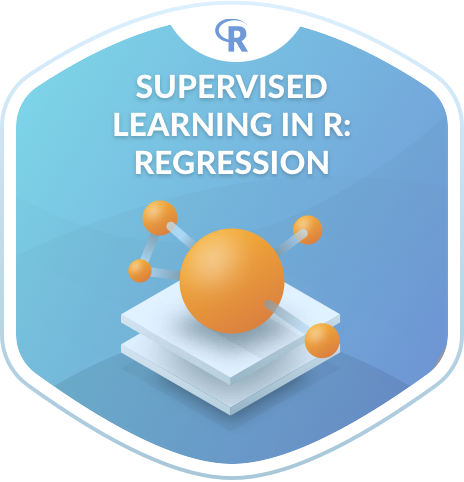

In [2]:
library("IRdisplay")
display_png(file="slr.png") 

In [4]:
#install.packages("xlsx")
#install.packages("data.table")

In [6]:
library(ggplot2)
library(dplyr)
library(tidyr)
library("xlsx")

# Course Description
From a machine learning perspective, regression is the task of predicting numerical outcomes from various inputs. In this course, you'll learn about different regression models, how to train these models in R, how to evaluate the models you train and use them to make predictions.

In [7]:
# Code a simple one-variable regression
# 
# For the first coding exercise, you'll create a formula to define a one-variable modeling task, 
# and then fit a linear model to the data. You are given the rates of male and female unemployment 
# in the United States over several years (Source).
# 
# The task is to predict the rate of female unemployment from the observed rate of male unemployment. 
# The outcome is female_unemployment, and the input is male_unemployment.
# 
# The sign of the variable coefficient tells you whether the outcome increases (+) or decreases (-) as the variable increases.
# 
# Recall the calling interface for lm() is:
# 
# lm(formula, data = ___)
# 
# Instructions
# 
# The data frame unemployment is in your workspace.
# 
# Define a formula that expresses female_unemployment as a function of male_unemployment. 
# Assign the formula to the variable fmla and print it.
# Then use lm() and fmla to fit a linear model to predict female unemployment from male unemployment 
# using the data set unemployment.
# Print the model. Is the coefficent for male unemployment consistent with what you would expect? 
# Does female unemployment increase as male unemployment does?

In [8]:
unemployment <- readRDS("unemployment.rds") 

In [9]:
# unemployment is loaded in the workspace
summary(unemployment)

# Define a formula to express female_unemployment as a function of male_unemployment
fmla <- female_unemployment ~ male_unemployment

# Print it
fmla

# Use the formula to fit a model: unemployment_model
unemployment_model <-  lm(fmla, data = unemployment)

# Print it 
unemployment_model

 male_unemployment female_unemployment
 Min.   :2.900     Min.   :4.000      
 1st Qu.:4.900     1st Qu.:4.400      
 Median :6.000     Median :5.200      
 Mean   :5.954     Mean   :5.569      
 3rd Qu.:6.700     3rd Qu.:6.100      
 Max.   :9.800     Max.   :7.900      

female_unemployment ~ male_unemployment


Call:
lm(formula = fmla, data = unemployment)

Coefficients:
      (Intercept)  male_unemployment  
           1.4341             0.6945  


In [10]:
# Examining a model
# 
# Let's look at the model unemployment_model that you have just created. 
# There are a variety of different ways to examine a model; each way provides different information. 
# We will use summary(), broom::glance(), and sigr::wrapFTest().
# 
# Instructions
# 
# The object unemployment_model is in your workspace.
# 
# Print unemployment_model again. What information does it report?
# Call summary() on unemployment_model. 
# In addition to the coefficient values, you get standard errors on the coefficient estimates, 
# and some goodness-of-fit metrics like R-squared.
# Call glance() on the model to see the performance metrics in an orderly data frame. 
# Can you match the information from summary() to the columns of glance()?
# Now call wrapFTest() on the model to see the R-squared again.

In [12]:
#install.packages('broom')
#install.packages('sigr')

In [13]:
library(broom)
library(sigr)

In [14]:
# broom and sigr are already loaded in your workspace
# Print unemployment_model
unemployment_model

# Call summary() on unemployment_model to get more details
summary(unemployment_model)

# Call glance() on unemployment_model to see the details in a tidier form
glance(unemployment_model)

# Call wrapFTest() on unemployment_model to see the most relevant details
wrapFTest(unemployment_model)


Call:
lm(formula = fmla, data = unemployment)

Coefficients:
      (Intercept)  male_unemployment  
           1.4341             0.6945  



Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0.8213157,0.8050716,0.5802596,50.56108,1.965985e-05,2,-10.28471,26.56943,28.26428,3.703714,11


[1] "F Test summary: (R2=0.8213, F(1,11)=50.56, p=1.966e-05)."

In [15]:
# Predicting from the unemployment model
# 
# In this exercise, you will use your unemployment model unemployment_model to make predictions from the unemployment data, 
# and compare predicted female unemployment rates to the actual observed female unemployment rates on the training data, 
# unemployment. You will also use your model to predict on the new data in newrates, 
# which consists of only one observation, where male unemployment is 5%.
# 
# The predict() interface for lm models takes the form
# 
# predict(model, newdata)
# You will use the ggplot2 package to make the plots, 
# so you will add the prediction column to the unemployment data frame. 
# You will plot outcome versus prediction, and compare them to the line that represents perfect predictions 
# (that is when the outcome is equal to the predicted value).
# 
# The ggplot2 command to plot a scatterplot of dframe$outcome versus dframe$pred 
# (pred on the x axis, outcome on the y axis), along with a blue line where outcome == pred is as follows:
# 
# ggplot(dframe, aes(x = pred, y = outcome)) + 
#        geom_point() +  
#        geom_abline(color = "blue")
# 
# Instructions
# 
# The objects unemployment, unemployment_model and newrates are in your workspace.
# 
# Use predict() to predict female unemployment rates from the unemployment data. Assign it to a new column: prediction.
# Use the library() command to load the ggplot2 package.
# Use ggplot() to compare the predictions to actual unemployment rates. 
# Put the predictions on the x axis. How close are the results to the line of perfect prediction?
# Use the data frame newrates to predict expected female unemployment rate 
# when male unemployment is 5%. Assign the answer to the variable pred and print it.

In [16]:
newrates <- read.xlsx(file ="df.xlsx", sheetIndex = 1, header=TRUE)

 male_unemployment female_unemployment
 Min.   :2.900     Min.   :4.000      
 1st Qu.:4.900     1st Qu.:4.400      
 Median :6.000     Median :5.200      
 Mean   :5.954     Mean   :5.569      
 3rd Qu.:6.700     3rd Qu.:6.100      
 Max.   :9.800     Max.   :7.900      

male_unemployment
<dbl>
5


1 
4.906757

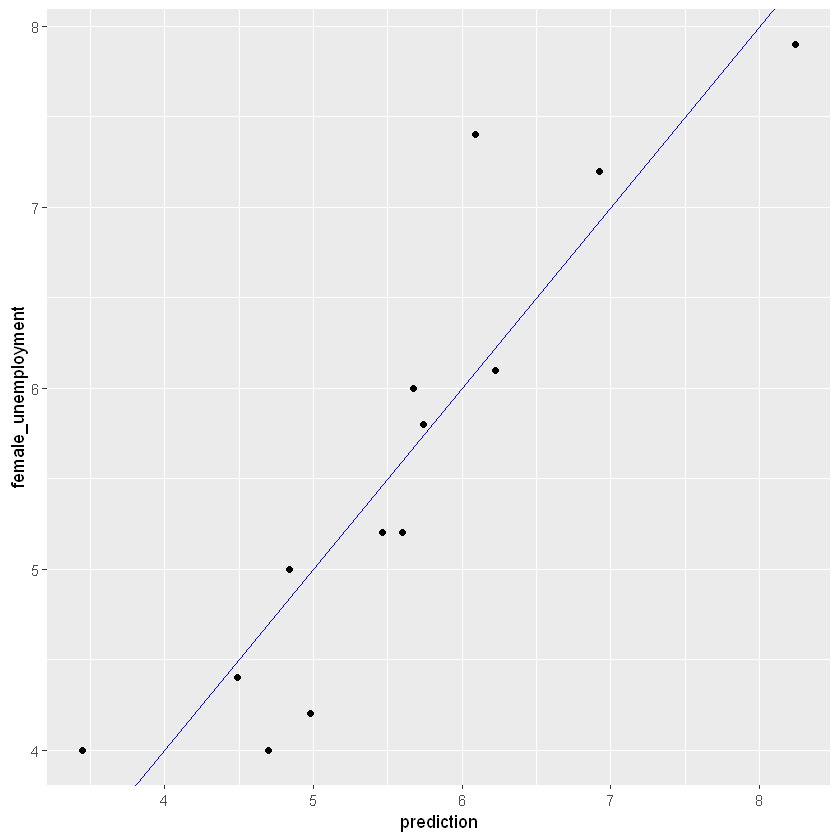

In [17]:
# unemployment is in your workspace
summary(unemployment)

# newrates is in your workspace
newrates

# Predict female unemployment in the unemployment data set
unemployment$prediction <-  predict(unemployment_model)

# load the ggplot2 package
library(ggplot2)

# Make a plot to compare predictions to actual (prediction on x axis)
ggplot(unemployment, aes(x = prediction, y = female_unemployment)) + 
  geom_point() +
  geom_abline(color = "blue")

# Predict female unemployment rate when male unemployment is 5%
pred <- predict(unemployment_model, newdata = newrates)
# Print it
pred

In [18]:
# Multivariate linear regression (Part 1)
# 
# In this exercise, you will work with the blood pressure dataset (Source), 
# and model blood_pressure as a function of weight and age.
# 
# Instructions
# 
# The data frame bloodpressure is in the workspace.
# 
# Define a formula that expresses blood_pressure explicitly as a function of age and weight. 
# Assign the formula to the variable fmla and print it.
# Use fmla to fit a linear model to predict blood_pressure from age and weight in the data set bloodpressure. 
# Call the model bloodpressure_model.
# Print the model and call summary() on it. Does blood pressure increase or decrease with age? With weight?

In [19]:
bloodpressure <- readRDS('bloodpressure.rds') 

In [20]:
# bloodpressure is in the workspace
summary(bloodpressure)

# Create the formula and print it
fmla <- blood_pressure ~ age + weight
fmla

# Fit the model: bloodpressure_model
bloodpressure_model <- lm(fmla, data = bloodpressure)

# Print bloodpressure_model and call summary()
bloodpressure_model
summary(bloodpressure_model)

 blood_pressure       age            weight   
 Min.   :128.0   Min.   :46.00   Min.   :167  
 1st Qu.:140.0   1st Qu.:56.50   1st Qu.:186  
 Median :153.0   Median :64.00   Median :194  
 Mean   :150.1   Mean   :62.45   Mean   :195  
 3rd Qu.:160.5   3rd Qu.:69.50   3rd Qu.:209  
 Max.   :168.0   Max.   :74.00   Max.   :220  

blood_pressure ~ age + weight


Call:
lm(formula = fmla, data = bloodpressure)

Coefficients:
(Intercept)          age       weight  
    30.9941       0.8614       0.3349  



Call:
lm(formula = fmla, data = bloodpressure)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4640 -1.1949 -0.4078  1.8511  2.6981 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  30.9941    11.9438   2.595  0.03186 * 
age           0.8614     0.2482   3.470  0.00844 **
weight        0.3349     0.1307   2.563  0.03351 * 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.318 on 8 degrees of freedom
Multiple R-squared:  0.9768,	Adjusted R-squared:  0.9711 
F-statistic: 168.8 on 2 and 8 DF,  p-value: 2.874e-07


In [21]:
# Multivariate linear regression (Part 2)
# 
# Now you will make predictions using the blood pressure model bloodpressure_model that you fit in the previous exercise.
# 
# You will also compare the predictions to outcomes graphically. 
# ggplot2 is already loaded in your workspace. Recall the plot command takes the form:
# 
# ggplot(dframe, aes(x = pred, y = outcome)) + 
#      geom_point() + 
#      geom_abline(color = "blue")
# 
# 
# Instructions
# 
# The objects bloodpressure and bloodpressure_model are in the workspace.
# 
# Use predict() to predict blood pressure in the bloodpressure dataset. 
# Assign the predictions to the column prediction.
# Graphically compare the predictions to actual blood pressures. 
# Put predictions on the x axis. How close are the results to the line of perfect prediction?

In [22]:
# bloodpressure is in your workspace
summary(bloodpressure)

# bloodpressure_model is in your workspace
bloodpressure_model

# predict blood pressure using bloodpressure_model :prediction
bloodpressure$prediction <- predict(bloodpressure_model)

 blood_pressure       age            weight   
 Min.   :128.0   Min.   :46.00   Min.   :167  
 1st Qu.:140.0   1st Qu.:56.50   1st Qu.:186  
 Median :153.0   Median :64.00   Median :194  
 Mean   :150.1   Mean   :62.45   Mean   :195  
 3rd Qu.:160.5   3rd Qu.:69.50   3rd Qu.:209  
 Max.   :168.0   Max.   :74.00   Max.   :220  


Call:
lm(formula = fmla, data = bloodpressure)

Coefficients:
(Intercept)          age       weight  
    30.9941       0.8614       0.3349  


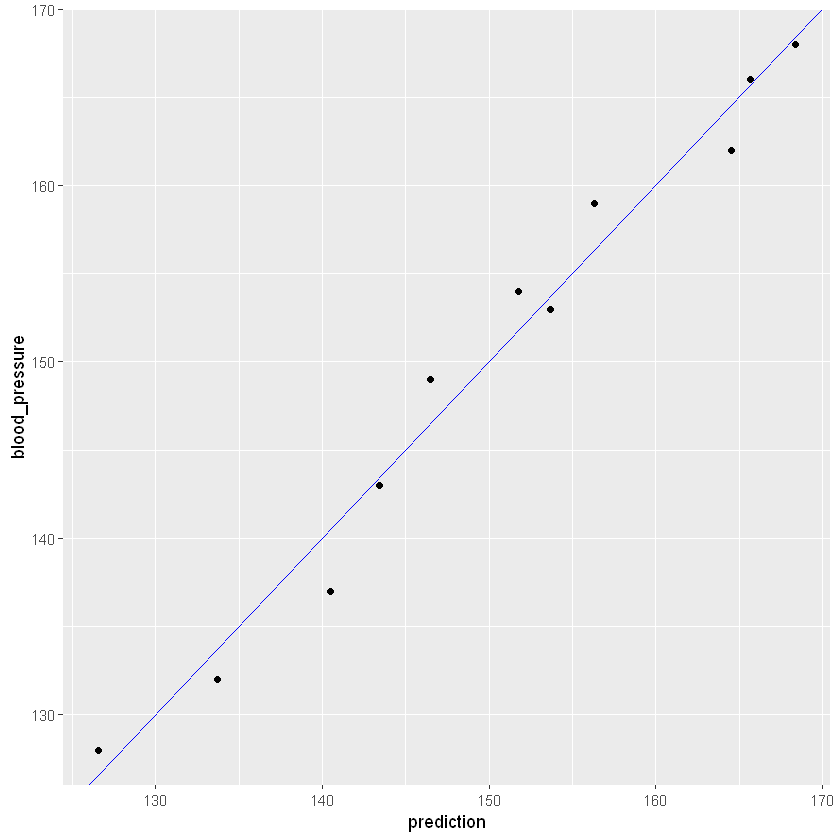

In [23]:
# plot the results
ggplot(bloodpressure, aes(x = prediction, y = blood_pressure)) + 
    geom_point() +
    geom_abline(color = "blue")

# 2. Training and Evaluating Regression Models

Now that we have learned how to fit basic linear regression models, we will learn how to evaluate how well our models perform. We will review evaluating a model graphically, and look at two basic metrics for regression models. We will also learn how to train a model that will perform well in the wild, not just on training data. Although we will demonstrate these techniques using linear regression, all these concepts apply to models fit with any regression algorithm.

In [24]:
# Graphically evaluate the unemployment model
# 
# In this exercise you will graphically evaluate the unemployment model, unemployment_model, 
# that you fit to the unemployment data in the previous chapter. 
# Recall that the model predicts female_unemployment from male_unemployment.
# 
# You will plot the model's predictions against the actual female_unemployment; 
# recall the command is of the form
# 
# ggplot(dframe, aes(x = pred, y = outcome)) + 
#        geom_point() +  
#        geom_abline()
# Then you will calculate the residuals:
# 
# residuals <- actual outcome - predicted outcome
# and plot predictions against residuals. 
# The residual graph will take a slightly different form: 
# you compare the residuals to the horizontal line x=0 (using geom_hline()) rather than to the line x=y. 
# The command will be provided.
# 
# The data frame unemployment and model unemployment_model are available in the workspace.
# 
# Instructions 1/2
# 
# Use predict() to get the model predictions and add them to unemployment as the column predictions.
# Plot predictions (on the x-axis) versus actual female unemployment rates. Are the predictions near the x=y line?

In [25]:
# unemployment, unemployment_model are in the workspace
summary(unemployment)
summary(unemployment_model)

# Make predictions from the model
unemployment$predictions <- predict(unemployment_model)


 male_unemployment female_unemployment   prediction   
 Min.   :2.900     Min.   :4.000       Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240  


Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


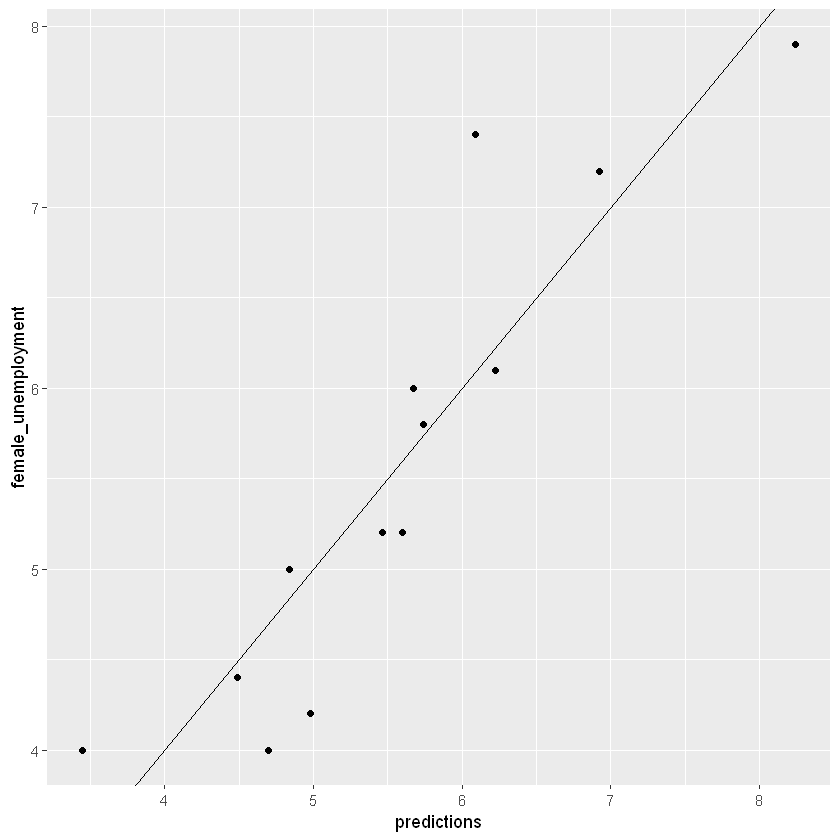

In [26]:
# Fill in the blanks to plot predictions (on x-axis) versus the female_unemployment rates
ggplot(unemployment, aes(x = predictions, y = female_unemployment)) + 
  geom_point() + 
  geom_abline()

In [27]:
# Instructions 2/2
# 
# 2
# Calculate the residuals between the predictions and actual unemployment rates. 
# Add these residuals to unemployment as the column residuals.
# Fill in the blanks to plot predictions (on the x-axis) versus residuals (on the y-axis). 
# This gives you a different view of the model's predictions as compared to ground truth.

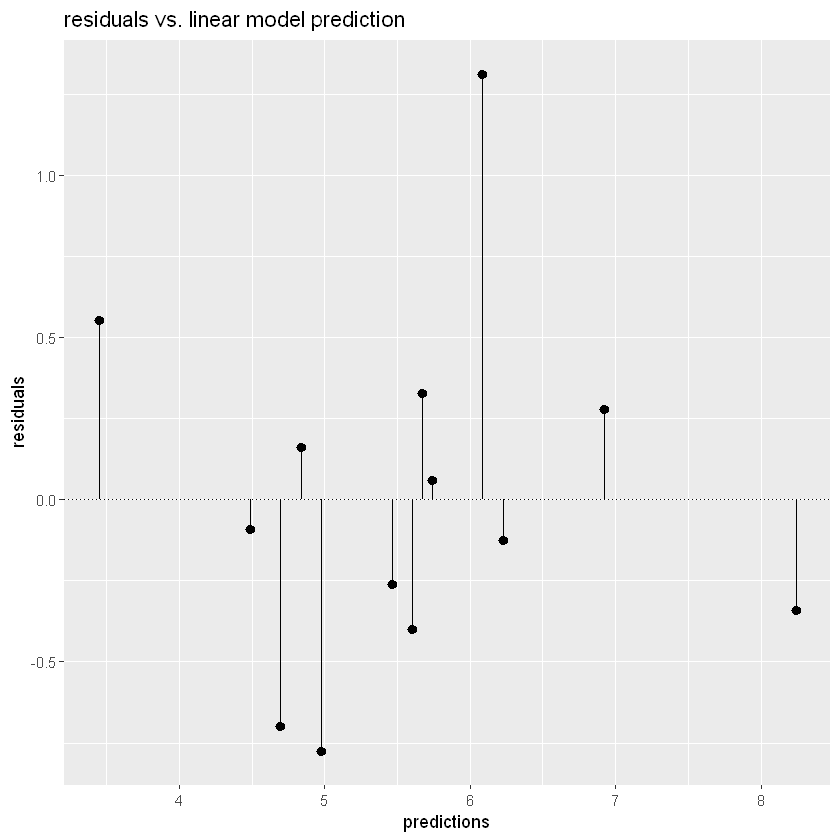

In [28]:
# From previous step
unemployment$predictions <- predict(unemployment_model)

# Calculate residuals
unemployment$residuals <- unemployment$female_unemployment - unemployment$predictions

# Fill in the blanks to plot predictions (on x-axis) versus the residuals
ggplot(unemployment, aes(x = predictions, y = residuals)) + 
  geom_pointrange(aes(ymin = 0, ymax = residuals)) + 
  geom_hline(yintercept = 0, linetype = 3) + 
  ggtitle("residuals vs. linear model prediction")

In [29]:
# The gain curve to evaluate the unemployment model
# 
# In the previous exercise you made predictions about female_unemployment 
# and visualized the predictions and the residuals. 
# Now, you will also plot the gain curve of the unemployment_model's predictions 
# against actual female_unemployment using the WVPlots::GainCurvePlot() function.
# 
# For situations where order is more important than exact values, 
# the gain curve helps you check if the model's predictions sort in the same order as the true outcome.
# 
# Calls to the function GainCurvePlot() look like:
# 
# GainCurvePlot(frame, xvar, truthvar, title)
# where
# 
# frame is a data frame
# xvar and truthvar are strings naming the prediction and actual outcome columns of frame
# title is the title of the plot
# When the predictions sort in exactly the same order, the relative Gini coefficient is 1. 
# When the model sorts poorly, the relative Gini coefficient is close to zero, or even negative.
# 
# Instructions
# 
# The data frame unemployment and the model unemployment_model are in the workspace.
# Load the package WVPlots using library().
# Plot the gain curve. Give the plot the title "Unemployment model". Do the model's predictions sort correctly?

In [31]:
#install.packages('WVPlots')

In [32]:
# unemployment is in the workspace (with predictions)
summary(unemployment)

# unemployment_model is in the workspace
summary(unemployment_model)

 male_unemployment female_unemployment   prediction     predictions   
 Min.   :2.900     Min.   :4.000       Min.   :3.448   Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837   1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601   Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569   Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087   3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240   Max.   :8.240  
   residuals       
 Min.   :-0.77621  
 1st Qu.:-0.34050  
 Median :-0.09004  
 Mean   : 0.00000  
 3rd Qu.: 0.27911  
 Max.   : 1.31254  


Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


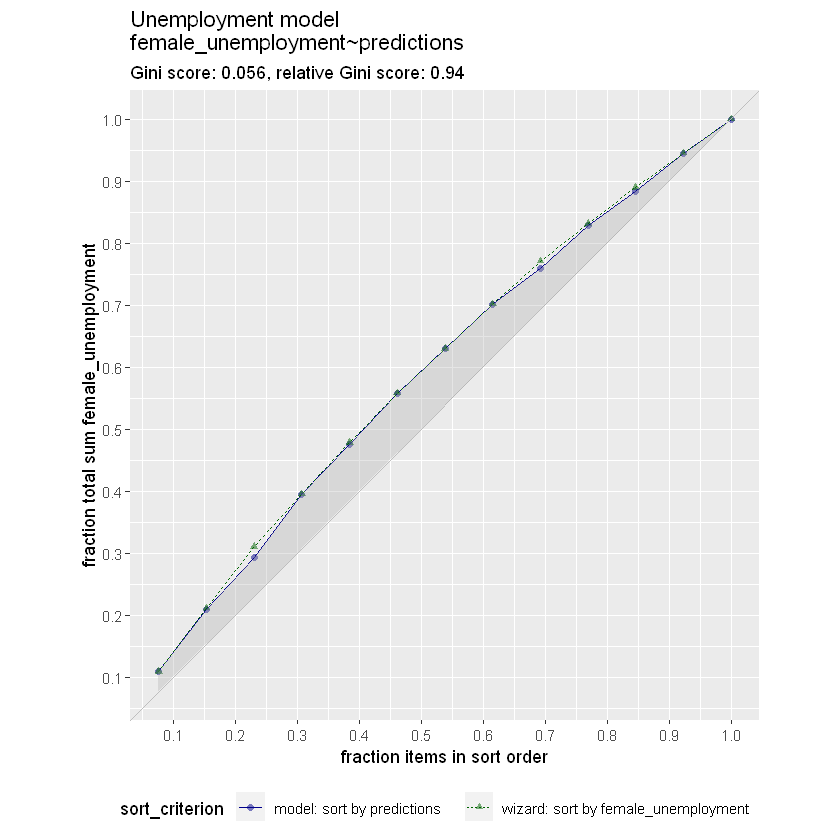

In [33]:
# Load the package WVPlots
library(WVPlots)

# Plot the Gain Curve
GainCurvePlot(unemployment, "predictions", "female_unemployment", "Unemployment model")

In [34]:
# Calculate RMSE
# 
# In this exercise you will calculate the RMSE of your unemployment model. 
# In the previous coding exercises, you added two columns to the unemployment dataset:
# 
# the model's predictions (predictions column)
# the residuals between the predictions and the outcome (residuals column)
# You can calculate the RMSE from a vector of residuals, res, as:

$RMSE=√mean(res2)$ 

In [35]:
# You want RMSE to be small. How small is "small"? 
# One heuristic is to compare the RMSE to the standard deviation of the outcome. 
# With a good model, the RMSE should be smaller.
# 
# Instructions
# 
# The data frame unemployment is in your workspace.
# 
# Review the unemployment data from the previous exercise.
# For convenience, assign the residuals column from unemployment to the variable res.
# Calculate RMSE: square res, take its mean, and then square root it. Assign this to the variable rmse and print it.
# Tip: you can do this in one step by wrapping the assignment in parentheses: (rmse <- ___)
# Calculate the standard deviation of female_unemployment and assign it to the variable sd_unemployment. 
# Print it. How does the rmse of the model compare to the standard deviation of the data?

In [36]:
# unemployment is in the workspace
summary(unemployment)

# For convenience put the residuals in the variable res
res <- unemployment$residuals

# Calculate RMSE, assign it to the variable rmse and print it
(rmse <- sqrt(mean(res^2)))

# Calculate the standard deviation of female_unemployment and print it
(sd_unemployment <- sd(unemployment$female_unemployment))

 male_unemployment female_unemployment   prediction     predictions   
 Min.   :2.900     Min.   :4.000       Min.   :3.448   Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837   1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601   Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569   Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087   3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240   Max.   :8.240  
   residuals       
 Min.   :-0.77621  
 1st Qu.:-0.34050  
 Median :-0.09004  
 Mean   : 0.00000  
 3rd Qu.: 0.27911  
 Max.   : 1.31254  

[1] 0.5337612

[1] 1.314271

In [37]:
# Calculate R-Squared
# 
# Now that you've calculated the RMSE of your model's predictions, 
# you will examine how well the model fits the data: that is, how much variance does it explain. 
# You can do this using R2.
# 
# Suppose y is the true outcome, p is the prediction from the model, 
# and res=y−p are the residuals of the predictions.
# 
# Then the total sum of squares tss ("total variance") of the data is:

$tss=∑(y−y¯¯¯)2$

In [38]:
# where y¯¯¯ is the mean value of y.
# 
# The residual sum of squared errors of the model, rss is:

$rss=∑res2$

In [39]:
# R2 (R-Squared), the "variance explained" by the model, is then:

$1−rss/tss$

In [40]:
# After you calculate R2, you will compare what you computed with the R2 reported by glance(). 
# glance() returns a one-row data frame; for a linear regression model, 
# one of the columns returned is the R2 of the model on the training data.
# 
# The data frame unemployment is in your workspace, 
# with the columns predictions and residuals that you calculated in a previous exercise.
# 
# Instructions
# The data frame unemployment and the model unemployment_model are in the workspace.
# 
# Calculate the mean female_unemployment and assign it to the variable fe_mean.
# Calculate the total sum of squares and assign it to the variable tss.
# Calculate the residual sum of squares and assign it to the variable rss.
# Calculate R2. Is it a good fit (R2 near 1)?
# Use glance() to get R2 from the model. Is it the same as what you calculated?

In [41]:
# unemployment is in your workspace
summary(unemployment)

# unemployment_model is in the workspace
summary(unemployment_model)

# Calculate mean female_unemployment: fe_mean. Print it
(fe_mean <- mean(unemployment$female_unemployment))

# Calculate total sum of squares: tss. Print it
(tss <- sum( (unemployment$female_unemployment - fe_mean)^2 ))

# Calculate residual sum of squares: rss. Print it
(rss <- sum(unemployment$residuals^2))

# Calculate R-squared: rsq. Print it. Is it a good fit?
(rsq <- 1 - (rss/tss))

# Get R-squared from glance. Print it
(rsq_glance <- glance(unemployment_model)$r.squared)

 male_unemployment female_unemployment   prediction     predictions   
 Min.   :2.900     Min.   :4.000       Min.   :3.448   Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837   1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601   Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569   Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087   3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240   Max.   :8.240  
   residuals       
 Min.   :-0.77621  
 1st Qu.:-0.34050  
 Median :-0.09004  
 Mean   : 0.00000  
 3rd Qu.: 0.27911  
 Max.   : 1.31254  


Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


[1] 5.569231

[1] 20.72769

[1] 3.703714

[1] 0.8213157

[1] 0.8213157

In [42]:
# Correlation and R-squared
# 
# The linear correlation of two variables, x and y, measures the strength of the linear relationship between them. 
# When x and y are respectively:
# the outcomes of a regression model that minimizes squared-error (like linear regression) and
# the true outcomes of the training data,
# then the square of the correlation is the same as R2. You will verify that in this exercise.
# 
# Instructions
# 
# Use cor() to get the correlation between the predictions and female unemployment. 
# Assign it to the variable rho and print it. Make sure you use Pearson correlation (the default).
# Square rho and assign it to rho2. Print it.
# Compare rho2 to R2 from the model (using glance()). Is it the same?

In [43]:
# unemployment is in your workspace
summary(unemployment)

# unemployment_model is in the workspace
summary(unemployment_model)

# Get the correlation between the prediction and true outcome: rho and print it
(rho <- cor(unemployment$predictions, unemployment$female_unemployment))

# Square rho: rho2 and print it
(rho2 <- rho ^ 2)

# Get R-squared from glance and print it
(rsq_glance <- glance(unemployment_model)$r.squared)

 male_unemployment female_unemployment   prediction     predictions   
 Min.   :2.900     Min.   :4.000       Min.   :3.448   Min.   :3.448  
 1st Qu.:4.900     1st Qu.:4.400       1st Qu.:4.837   1st Qu.:4.837  
 Median :6.000     Median :5.200       Median :5.601   Median :5.601  
 Mean   :5.954     Mean   :5.569       Mean   :5.569   Mean   :5.569  
 3rd Qu.:6.700     3rd Qu.:6.100       3rd Qu.:6.087   3rd Qu.:6.087  
 Max.   :9.800     Max.   :7.900       Max.   :8.240   Max.   :8.240  
   residuals       
 Min.   :-0.77621  
 1st Qu.:-0.34050  
 Median :-0.09004  
 Mean   : 0.00000  
 3rd Qu.: 0.27911  
 Max.   : 1.31254  


Call:
lm(formula = fmla, data = unemployment)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.77621 -0.34050 -0.09004  0.27911  1.31254 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        1.43411    0.60340   2.377   0.0367 *  
male_unemployment  0.69453    0.09767   7.111 1.97e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5803 on 11 degrees of freedom
Multiple R-squared:  0.8213,	Adjusted R-squared:  0.8051 
F-statistic: 50.56 on 1 and 11 DF,  p-value: 1.966e-05


[1] 0.9062647

[1] 0.8213157

[1] 0.8213157

In [44]:
# Generating a random test/train split
# 
# For the next several exercises you will use the mpg data from the package ggplot2. 
# The data describes the characteristics of several makes and models of cars from different years. 
# The goal is to predict city fuel efficiency from highway fuel efficiency.
# 
# In this exercise, you will split mpg into a training set mpg_train (75% of the data) 
# and a test set mpg_test (25% of the data). 
# One way to do this is to generate a column of uniform random numbers between 0 and 1, 
# using the function runif().
# 
# If you have a data set dframe of size N, and you want a random subset of approximately size 100∗X% of N 
# (where X is between 0 and 1), then:
# 
# Generate a vector of uniform random numbers: gp = runif(N).
# dframe[gp < X,] will be about the right size.
# dframe[gp >= X,] will be the complement.
# 
# Instructions
# 
# The data frame mpg is in the workspace.
# 
# Use the function nrow to get the number of rows in the data frame mpg. Assign this count to the variable N and print it.
# Calculate about how many rows 75% of N should be. Assign it to the variable target and print it.
# Use runif() to generate a vector of N uniform random numbers, called gp.
# Use gp to split mpg into mpg_train and mpg_test (with mpg_train containing approximately 75% of the data).
# Use nrow() to check the size of mpg_train and mpg_test. Are they about the right size?

In [45]:
# mpg is in the workspace
summary(mpg)
dim(mpg)

# Use nrow to get the number of rows in mpg (N) and print it
(N <- nrow(mpg))

# Calculate how many rows 75% of N should be and print it
# Hint: use round() to get an integer
(target <- round(N * 0.75))

# Create the vector of N uniform random variables: gp
gp <- runif(N)

# Use gp to create the training set: mpg_train (75% of data) and mpg_test (25% of data)
mpg_train <- mpg[gp < 0.75, ]
mpg_test <- mpg[gp >= 0.75, ]

# Use nrow() to examine mpg_train and mpg_test
nrow(mpg_train)
nrow(mpg_test)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

[1] 234  11

[1] 234

[1] 176

[1] 176

[1] 58

In [46]:
# Train a model using test/train split
# 
# Now that you have split the mpg dataset into mpg_train and mpg_test, 
# you will use mpg_train to train a model to predict city fuel efficiency (cty) from highway fuel efficiency (hwy).
# 
# Instructions
# 
# The data frame mpg_train is in the workspace.
# 
# Create a formula fmla that expresses the relationship cty as a function of hwy. Print it.
# Train a model mpg_model on mpg_train to predict cty from hwy using fmla and lm().
# Use summary() to examine the model.

In [47]:
# mpg_train is in the workspace
summary(mpg_train)

# create a formula to express cty as a function of hwy: fmla and print it.
(fmla <- cty ~ hwy)

# Now use lm() to build a model mpg_model from mpg_train that predicts cty from hwy 
mpg_model <- lm(fmla, data = mpg_train)

# Use summary() to examine the model
summary(mpg_model)

 manufacturer          model               displ            year     
 Length:176         Length:176         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.500   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.400   Median :2008  
                                       Mean   :3.535   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :6.500   Max.   :2008  
      cyl       trans               drv                 cty       
 Min.   :4   Length:176         Length:176         Min.   : 9.00  
 1st Qu.:4   Class :character   Class :character   1st Qu.:14.00  
 Median :6   Mode  :character   Mode  :character   Median :16.00  
 Mean   :6                                         Mean   :16.76  
 3rd Qu.:8                                         3rd Qu.:19.00  
 Max.   :8                                         Max.   :33.00  
      hwy             fl               cl

cty ~ hwy


Call:
lm(formula = fmla, data = mpg_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8801 -0.8414 -0.0242  0.7737  4.7349 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.0521     0.3828   2.748  0.00662 ** 
hwy           0.6731     0.0159  42.326  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.251 on 174 degrees of freedom
Multiple R-squared:  0.9115,	Adjusted R-squared:  0.911 
F-statistic:  1791 on 1 and 174 DF,  p-value: < 2.2e-16


In [48]:
# Evaluate a model using test/train split
# 
# Now you will test the model mpg_model on the test data, mpg_test. Functions rmse() and r_squared() 
# to calculate RMSE and R-squared have been provided for convenience:
# 
# rmse(predcol, ycol)
# r_squared(predcol, ycol)
# where:
# 
# predcol: The predicted values
# ycol: The actual outcome
# You will also plot the predictions vs. the outcome.
# 
# Generally, model performance is better on the training data than the test data 
# (though sometimes the test set "gets lucky"). 
# A slight difference in performance is okay; 
# if the performance on training is significantly better, there is a problem.
# 
# Instructions
# 
# The data frames mpg_train and mpg_test, and the model mpg_model are in the workspace, 
# along with the functions rmse() and r_squared().
# 
# Predict city fuel efficiency from hwy on the mpg_train data. Assign the predictions to the column pred.
# Predict city fuel efficiency from hwy on the mpg_test data. Assign the predictions to the column pred.
# Use rmse() to evaluate rmse for both the test and training sets. Compare. Are the performances similar?
# Do the same with r_squared(). Are the performances similar?
# Use ggplot2 to plot the predictions against cty on the test data.

In [50]:
#install.packages('Metrics')

In [51]:
library(Metrics)

In [53]:
#install.packages('MetricsWeighted')

In [55]:
library(MetricsWeighted)

In [56]:
# Examine the objects in the workspace
ls.str()

bloodpressure : 'data.frame':	11 obs. of  4 variables:
 $ blood_pressure: int  132 143 153 162 154 168 137 149 159 128 ...
 $ age           : int  52 59 67 73 64 74 54 61 65 46 ...
 $ weight        : int  173 184 194 211 196 220 188 188 207 167 ...
 $ prediction    : num  134 143 154 165 152 ...
bloodpressure_model : List of 12
 $ coefficients : Named num [1:3] 30.994 0.861 0.335
 $ residuals    : Named num [1:11] -1.718 -0.432 -0.672 -2.533 2.243 ...
 $ effects      : Named num [1:11] -497.8 42.17 5.94 -2.11 2.65 ...
 $ rank         : int 3
 $ fitted.values: Named num [1:11] 134 143 154 165 152 ...
 $ assign       : int [1:3] 0 1 2
 $ qr           :List of 5
 $ df.residual  : int 8
 $ xlevels      : Named list()
 $ call         : language lm(formula = fmla, data = bloodpressure)
 $ terms        :Classes 'terms', 'formula'  language blood_pressure ~ age + weight
 $ model        :'data.frame':	11 obs. of  3 variables:
fe_mean :  num 5.57
fmla : Class 'formula'  language cty ~ hwy
gp :  

In [57]:
# predict cty from hwy for the training set
mpg_train$pred <- predict(mpg_model)

# predict cty from hwy for the test set
mpg_test$pred <- predict(mpg_model, newdata = mpg_test)

# Evaluate the rmse on both training and test data and print them
(rmse_train <- rmse(mpg_train$pred, mpg_train$cty))
(rmse_test <- rmse(mpg_test$pred, mpg_test$cty))


# Evaluate the r-squared on both training and test data.and print them
(rsq_train <- r_squared(mpg_train$pred, mpg_train$cty))
(rsq_test <- r_squared(mpg_test$pred, mpg_test$cty))

[1] 1.243577

[1] 1.264599

[1] 0.9028727

[1] 0.9010125

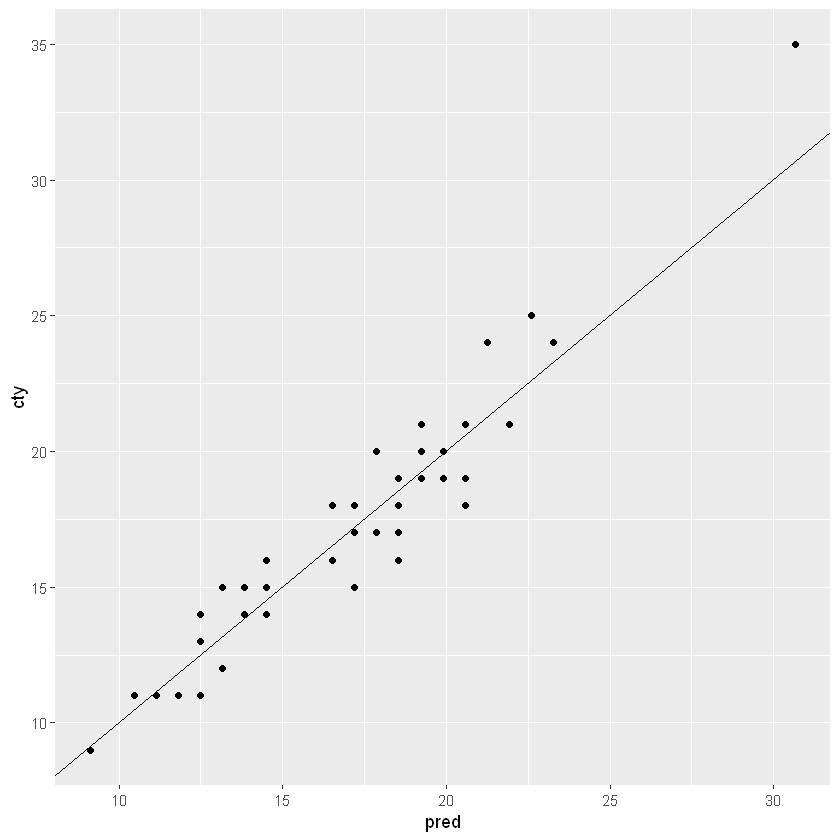

In [58]:
# Plot the predictions (on the x-axis) against the outcome (cty) on the test data
ggplot(mpg_test, aes(x = pred, y = cty)) + 
  geom_point() + 
  geom_abline()

In [59]:
# Create a cross validation plan
# 
# There are several ways to implement an n-fold cross validation plan. 
# In this exercise you will create such a plan using vtreat::kWayCrossValidation(), and examine it.
# 
# kWayCrossValidation() creates a cross validation plan with the following call:
# 
# splitPlan <- kWayCrossValidation(nRows, nSplits, dframe, y)
# where nRows is the number of rows of data to be split, and nSplits is the desired number of cross-validation folds.
# 
# Strictly speaking, dframe and y aren't used by kWayCrossValidation; 
# they are there for compatibility with other vtreat data partitioning functions. 
# You can set them both to NULL.
# 
# The resulting splitPlan is a list of nSplits elements; each element contains two vectors:
# 
# train: the indices of dframe that will form the training set
# app: the indices of dframe that will form the test (or application) set
# In this exercise you will create a 3-fold cross-validation plan for the data set mpg.
# 
# Instructions
# 
# Load the package vtreat.
# Get the number of rows in mpg and assign it to the variable nRows.
# Call kWayCrossValidation to create a 3-fold cross validation plan and assign it to the variable splitPlan.
# You can set the last two arguments of the function to NULL.
# Call str() to examine the structure of splitPlan.

In [61]:
#install.packages('vtreat')

In [62]:
library(vtreat)

Loading required package: wrapr


Attaching package: 'wrapr'


The following object is masked from 'package:tidyr':

    unpack


The following object is masked from 'package:dplyr':

    coalesce




In [63]:
# Load the package vtreat
library(vtreat)

# mpg is in the workspace
summary(mpg)

# Get the number of rows in mpg
nRows <- nrow(mpg)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

In [64]:
# Implement the 3-fold cross-fold plan with vtreat
splitPlan <- kWayCrossValidation(nRows, 3, NULL, NULL)

# Examine the split plan
str(splitPlan)

List of 3
 $ :List of 2
  ..$ train: int [1:156] 2 3 5 6 7 8 9 10 11 12 ...
  ..$ app  : int [1:78] 105 27 225 223 117 199 221 177 13 188 ...
 $ :List of 2
  ..$ train: int [1:156] 1 2 4 5 7 9 10 13 14 17 ...
  ..$ app  : int [1:78] 85 121 186 87 185 130 62 234 97 99 ...
 $ :List of 2
  ..$ train: int [1:156] 1 3 4 6 8 11 12 13 15 16 ...
  ..$ app  : int [1:78] 115 132 150 183 25 109 231 151 64 162 ...
 - attr(*, "splitmethod")= chr "kwaycross"


In [65]:
# Evaluate a modeling procedure using n-fold cross-validation
# 
# In this exercise you will use splitPlan, the 3-fold cross validation plan from the previous exercise, 
# to make predictions from a model that predicts mpg$cty from mpg$hwy.
# 
# If dframe is the training data, then one way to add a column of cross-validation predictions to the frame is as follows:
# 
# # Initialize a column of the appropriate length
# dframe$pred.cv <- 0 
# 
# # k is the number of folds
# # splitPlan is the cross validation plan
# 
# for(i in 1:k) {
#   # Get the ith split
#   split <- splitPlan[[i]]
# 
#   # Build a model on the training data 
#   # from this split 
#   # (lm, in this case)
#   model <- lm(fmla, data = dframe[split$train,])
# 
#   # make predictions on the 
#   # application data from this split
#   dframe$pred.cv[split$app] <- predict(model, newdata = dframe[split$app,])
# }
# Cross-validation predicts how well a model built from all the data will perform on new data. 
# As with the test/train split, for a good modeling procedure, cross-validation performance 
# and training performance should be close.
# 
# Instructions
# 
# The data frame mpg, the cross validation plan splitPlan, and the function to calculate RMSE (rmse()) 
# from one of the previous exercises is available in your workspace.
# 
# Run the 3-fold cross validation plan from splitPlan and put the predictions in the column mpg$pred.cv.
# Use lm() and the formula cty ~ hwy.
# Create a linear regression model on all the mpg data (formula cty ~ hwy) and assign the predictions to mpg$pred.
# Use rmse() to get the root mean squared error of the predictions from the full model (mpg$pred). 
# Recall that rmse() takes two arguments, the predicted values, and the actual outcome.
# Get the root mean squared error of the cross-validation predictions. Are the two values about the same?

In [66]:
# mpg is in the workspace
summary(mpg)

# splitPlan is in the workspace
str(splitPlan)

# Run the 3-fold cross validation plan from splitPlan
k <- 3 # Number of folds
mpg$pred.cv <- 0 
for(i in 1:k) {
  split <- splitPlan[[i]]
  model <- lm(cty ~ hwy, data = mpg[split$train, ])
  mpg$pred.cv[split$app] <- predict(model, newdata = mpg[split$app, ])
}

# Predict from a full model
mpg$pred <- predict(lm(cty ~ hwy, data = mpg))

# Get the rmse of the full model's predictions
rmse(mpg$pred, mpg$cty)

# Get the rmse of the cross-validation predictions
rmse(mpg$pred.cv, mpg$cty)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

List of 3
 $ :List of 2
  ..$ train: int [1:156] 2 3 5 6 7 8 9 10 11 12 ...
  ..$ app  : int [1:78] 105 27 225 223 117 199 221 177 13 188 ...
 $ :List of 2
  ..$ train: int [1:156] 1 2 4 5 7 9 10 13 14 17 ...
  ..$ app  : int [1:78] 85 121 186 87 185 130 62 234 97 99 ...
 $ :List of 2
  ..$ train: int [1:156] 1 3 4 6 8 11 12 13 15 16 ...
  ..$ app  : int [1:78] 115 132 150 183 25 109 231 151 64 162 ...
 - attr(*, "splitmethod")= chr "kwaycross"


[1] 1.247045

[1] 1.276978

# 3. Issues to Consider

Before moving on to more sophisticated regression techniques, we will look at some other modeling issues: modeling with categorical inputs, interactions between variables, and when you might consider transforming inputs and outputs before modeling. While more sophisticated regression techniques manage some of these issues automatically, it's important to be aware of them, in order to understand which methods best handle various issues -- and which issues you must still manage yourself.

In [67]:
# Examining the structure of categorical inputs
# 
# For this exercise you will call model.matrix() to examine how R represents data 
# with both categorical and numerical inputs for modeling. 
# The dataset flowers (derived from the Sleuth3 package) is loaded into your workspace. It has the following columns:
# 
# Flowers: the average number of flowers on a meadowfoam plant
# Intensity: the intensity of a light treatment applied to the plant
# Time: A categorical variable - when (Late or Early) in the lifecycle the light treatment occurred
# The ultimate goal is to predict Flowers as a function of Time and Intensity.
# 
# Instructions
# 
# The data frame flowers is in your workspace.
# 
# Call the str() function on flowers to see the types of each column.
# Use the unique() function on the column flowers$Time to see the possible values that Time takes. 
# How many unique values are there?
# 
# Create a formula to express Flowers as a function of Intensity and Time. 
# Assign it to the variable fmla and print it.
# 
# Use fmla and model.matrix() to create the model matrix for the data frame flowers. 
# Assign it to the variable mmat.
# 
# Use head() to examine the first 20 lines of flowers.
# Now examine the first 20 lines of mmat.
# Is the numeric column Intensity different?
# What happened to the categorical column Time from flowers?
# How is Time == 'Early' represented? And Time == 'Late'?

In [68]:
flowers <- read.xlsx(file ="df.xlsx", sheetIndex = 2, header=TRUE)

In [69]:
# Call str on flowers to see the types of each column
str(flowers)

# Use unique() to see how many possible values Time takes
unique(flowers$Time)

# Build a formula to express Flowers as a function of Intensity and Time: fmla. Print it
(fmla <- as.formula("Flowers ~ Intensity + Time"))

# Use fmla and model.matrix to see how the data is represented for modeling
mmat <- model.matrix(fmla, flowers)

# Examine the first 20 lines of flowers
head(flowers, n = 20)

# Examine the first 20 lines of mmat
head(mmat, n = 20)

'data.frame':	24 obs. of  3 variables:
 $ Flowers  : num  62.3 77.4 55.3 54.2 49.6 61.9 39.4 45.7 31.3 44.9 ...
 $ Time     : Factor w/ 2 levels "Early","Late": 2 2 2 2 2 2 2 2 2 2 ...
 $ Intensity: num  150 150 300 300 450 450 600 600 750 750 ...


[1] Late  Early
Levels: Early Late

Flowers ~ Intensity + Time

,Flowers,Time,Intensity
,<dbl>,<fct>,<dbl>
1,62.3,Late,150
2,77.4,Late,150
3,55.3,Late,300
4,54.2,Late,300
5,49.6,Late,450
6,61.9,Late,450
7,39.4,Late,600
8,45.7,Late,600
9,31.3,Late,750


,(Intercept),Intensity,TimeLate
1,1,150,1
2,1,150,1
3,1,300,1
4,1,300,1
5,1,450,1
6,1,450,1
7,1,600,1
8,1,600,1
9,1,750,1
10,1,750,1


In [70]:
# Modeling with categorical inputs
# 
# For this exercise you will fit a linear model to the flowers data, 
# to predict Flowers as a function of Time and Intensity.
# 
# The model formula fmla that you created in the previous exercise is still in your workspace, 
# as is the model matrix mmat.
# 
# Instructions
# 
# Use fmla and lm to train a linear model that predicts Flowers from Intensity and Time. 
# Assign the model to the variable flower_model.
# Use summary() to remind yourself of the structure of mmat.
# Use summary() to examine the flower_model. Do the variables match what you saw in mmat?
# Use flower_model to predict the number of flowers. Add the predictions to flowers as the column predictions.
# Fill in the blanks to plot predictions vs. actual flowers (predictions on the x-axis).

In [71]:
# flowers in is the workspace
str(flowers)

# fmla is in the workspace
fmla

# Fit a model to predict Flowers from Intensity and Time : flower_model
flower_model <-  lm(fmla, data = flowers)

# Use summary on mmat to remind yourself of its structure
summary(mmat)

# Use summary to examine the flower_model
summary(flower_model)

# predict the number of flowers on each plant
flowers$predictions <- predict(flower_model)


'data.frame':	24 obs. of  3 variables:
 $ Flowers  : num  62.3 77.4 55.3 54.2 49.6 61.9 39.4 45.7 31.3 44.9 ...
 $ Time     : Factor w/ 2 levels "Early","Late": 2 2 2 2 2 2 2 2 2 2 ...
 $ Intensity: num  150 150 300 300 450 450 600 600 750 750 ...


Flowers ~ Intensity + Time

  (Intercept)   Intensity      TimeLate  
 Min.   :1    Min.   :150   Min.   :0.0  
 1st Qu.:1    1st Qu.:300   1st Qu.:0.0  
 Median :1    Median :525   Median :0.5  
 Mean   :1    Mean   :525   Mean   :0.5  
 3rd Qu.:1    3rd Qu.:750   3rd Qu.:1.0  
 Max.   :1    Max.   :900   Max.   :1.0  


Call:
lm(formula = fmla, data = flowers)

Residuals:
   Min     1Q Median     3Q    Max 
-9.652 -4.139 -1.558  5.632 12.165 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  83.464167   3.273772  25.495  < 2e-16 ***
Intensity    -0.040471   0.005132  -7.886 1.04e-07 ***
TimeLate    -12.158333   2.629557  -4.624 0.000146 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.441 on 21 degrees of freedom
Multiple R-squared:  0.7992,	Adjusted R-squared:   0.78 
F-statistic: 41.78 on 2 and 21 DF,  p-value: 4.786e-08


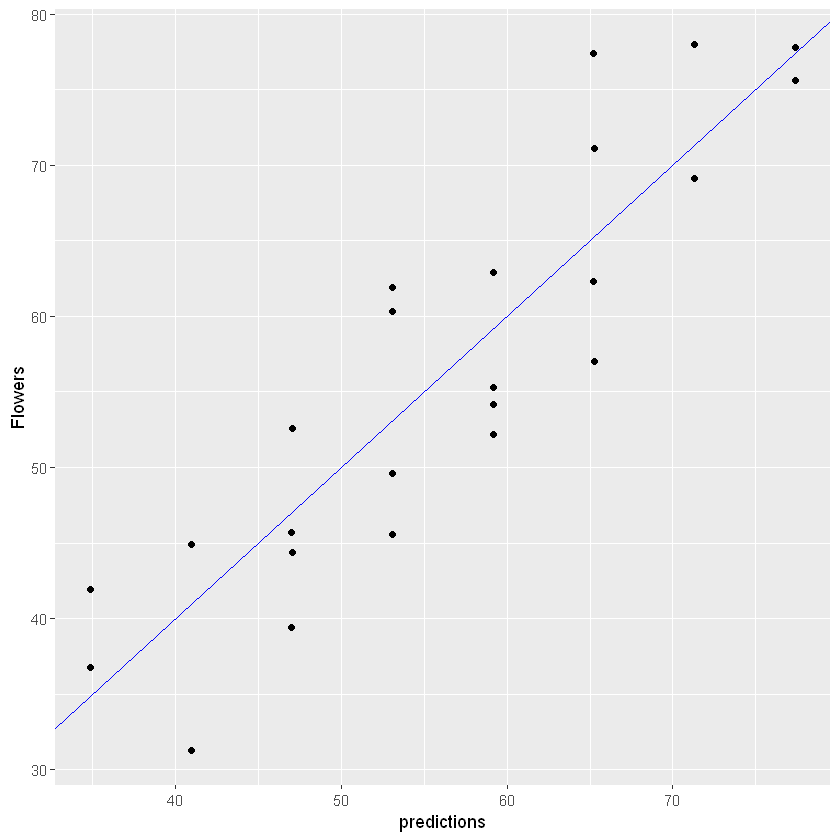

In [80]:
# Plot predictions vs actual flowers (predictions on x-axis)
ggplot(flowers, aes(x = predictions, y = Flowers)) + 
  geom_point() +
  geom_abline(color = "blue")

In [72]:
# Modeling an interaction
# 
# In this exercise you will use interactions to model the effect 
# of gender and gastric activity on alcohol metabolism.
# 
# The data frame alcohol has columns:
# 
# Metabol: the alcohol metabolism rate
# Gastric: the rate of gastric alcohol dehydrogenase activity
# Sex: the sex of the drinker (Male or Female)
# In the video, we fit three models to the alcohol data:
# 
# one with only additive (main effect) terms : Metabol ~ Gastric + Sex
# two models, each with interactions between gastric activity and sex
# We saw that one of the models with interaction terms had a better R-squared than the additive model, 
# suggesting that using interaction terms gives a better fit. 
# In this exercise we will compare the R-squared of one of the interaction models to the main-effects-only model.
# 
# Recall that the operator : designates the interaction between two variables. 
# The operator * designates the interaction between the two variables, plus the main effects.
# 
# x*y = x + y + x:y
# 
# Instructions
# The data frame alcohol is in your workspace.
# 
# Write a formula that expresses Metabol as a function of Gastric and Sex with no interactions.
# Assign the formula to the variable fmla_add and print it.
# Write a formula that expresses Metabol as a function of the interaction between Gastric and Sex.
# Add Gastric as a main effect, but not Sex.
# Assign the formula to the variable fmla_interaction and print it.
# Fit a linear model with only main effects: model_add to the data.
# Fit a linear model with the interaction: model_interaction to the data.
# Call summary() on both models. Which has a better R-squared?

In [73]:
alcohol <- read.xlsx(file ="df.xlsx", sheetIndex = 3, header=TRUE)

In [74]:
# alcohol is in the workspace
summary(alcohol)

# Create the formula with main effects only
(fmla_add <- Metabol ~ Gastric + Sex)

# Create the formula with interactions
(fmla_interaction <- Metabol ~  Gastric + Gastric:Sex)

# Fit the main effects only model
model_add <- lm(fmla_add, data = alcohol)

# Fit the interaction model
model_interaction <- lm(fmla_interaction, data = alcohol)

# Call summary on both models and compare
summary(model_add)
summary(model_interaction)

    Subject         Metabol          Gastric          Sex    
 Min.   : 1.00   Min.   : 0.100   Min.   :0.800   Female:18  
 1st Qu.: 8.75   1st Qu.: 0.600   1st Qu.:1.200   Male  :14  
 Median :16.50   Median : 1.700   Median :1.600              
 Mean   :16.50   Mean   : 2.422   Mean   :1.863              
 3rd Qu.:24.25   3rd Qu.: 2.925   3rd Qu.:2.200              
 Max.   :32.00   Max.   :12.300   Max.   :5.200              
          Alcohol  
 Alcoholic    : 8  
 Non-alcoholic:24  
                   
                   
                   
                   

Metabol ~ Gastric + Sex

Metabol ~ Gastric + Gastric:Sex


Call:
lm(formula = fmla_add, data = alcohol)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2779 -0.6328 -0.0966  0.5783  4.5703 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.9466     0.5198  -3.745 0.000796 ***
Gastric       1.9656     0.2674   7.352 4.24e-08 ***
SexMale       1.6174     0.5114   3.163 0.003649 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.331 on 29 degrees of freedom
Multiple R-squared:  0.7654,	Adjusted R-squared:  0.7492 
F-statistic: 47.31 on 2 and 29 DF,  p-value: 7.41e-10



Call:
lm(formula = fmla_interaction, data = alcohol)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4656 -0.5091  0.0143  0.5660  4.0668 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.7504     0.5310  -1.413 0.168236    
Gastric           1.1489     0.3450   3.331 0.002372 ** 
Gastric:SexMale   1.0422     0.2412   4.321 0.000166 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.204 on 29 degrees of freedom
Multiple R-squared:  0.8081,	Adjusted R-squared:  0.7948 
F-statistic: 61.05 on 2 and 29 DF,  p-value: 4.033e-11


In [75]:
# Modeling an interaction (2)
# 
# In this exercise, you will compare the performance of the interaction model 
# you fit in the previous exercise to the performance of a main-effects only model. 
# Because this data set is small, we will use cross-validation to simulate making predictions on out-of-sample data.
# 
# You will begin to use the dplyr package to do calculations.
# 
# mutate() adds new columns to a tbl (a type of data frame)
# group_by() specifies how rows are grouped in a tbl
# summarize() computes summary statistics of a column
# You will also use tidyr's gather() which takes multiple columns and collapses them into key-value pairs.
# 
# Instructions
# 
# The data frame alcohol and the formulas fmla_add and fmla_interaction are in the workspace.
# 
# Use kWayCrossValidation() to create a splitting plan for a 3-fold cross validation.
# The first argument is the number of rows to be split.
# The second argument is the number of folds for the cross-validation.
# You can set the 3rd and 4th arguments of the function to NULL.
# Examine and run the sample code to get the 3-fold cross-validation predictions of a model with no interactions 
# and assign them to the column pred_add.
# 
# Get the 3-fold cross-validation predictions of the model with interactions. 
# Assign the predictions to the column pred_interaction.
# 
# The sample code shows you the procedure.
# Use the same splitPlan that you already created.
# Fill in the blanks to
# gather the predictions into a single column pred.
# add a column of residuals (actual outcome - predicted outcome).
# get the RMSE of the cross-validation predictions for each model type.
# Compare the RMSEs. Based on these results, which model should you use?

In [76]:
# alcohol is in the workspace
summary(alcohol)

# Both the formulae are in the workspace
fmla_add
fmla_interaction

    Subject         Metabol          Gastric          Sex    
 Min.   : 1.00   Min.   : 0.100   Min.   :0.800   Female:18  
 1st Qu.: 8.75   1st Qu.: 0.600   1st Qu.:1.200   Male  :14  
 Median :16.50   Median : 1.700   Median :1.600              
 Mean   :16.50   Mean   : 2.422   Mean   :1.863              
 3rd Qu.:24.25   3rd Qu.: 2.925   3rd Qu.:2.200              
 Max.   :32.00   Max.   :12.300   Max.   :5.200              
          Alcohol  
 Alcoholic    : 8  
 Non-alcoholic:24  
                   
                   
                   
                   

Metabol ~ Gastric + Sex

Metabol ~ Gastric + Gastric:Sex

In [77]:
# Create the splitting plan for 3-fold cross validation
set.seed(34245)  # set the seed for reproducibility
splitPlan <- kWayCrossValidation(nrow(alcohol), 3, NULL, NULL)

# Sample code: Get cross-val predictions for main-effects only model
alcohol$pred_add <- 0  # initialize the prediction vector
for(i in 1:3) {
  split <- splitPlan[[i]]
  model_add <- lm(fmla_add, data = alcohol[split$train, ])
  alcohol$pred_add[split$app] <- predict(model_add, newdata = alcohol[split$app, ])
}

# Get the cross-val predictions for the model with interactions
alcohol$pred_interaction <- 0 # initialize the prediction vector
for(i in 1:3) {
  split <- splitPlan[[i]]
  model_interaction <- lm(fmla_interaction, data = alcohol[split$train, ])
  alcohol$pred_interaction[split$app] <- predict(model_interaction, newdata = alcohol[split$app, ])
}

# Get RMSE
alcohol %>% 
  gather(key = modeltype, value = pred, pred_add, pred_interaction) %>%
  mutate(residuals = Metabol - pred) %>%
  group_by(modeltype) %>%
  summarize(rmse = sqrt(mean(residuals^2)))

`summarise()` ungrouping output (override with `.groups` argument)



modeltype,rmse
<chr>,<dbl>
pred_add,1.375565
pred_interaction,1.303637


In [78]:
# Relative error
# 
# In this exercise, you will compare relative error to absolute error. 
# For the purposes of modeling, we will define relative error as

$$ rel = \frac{(y - pred)}{y} $$

In [79]:
# that is, the error is relative to the true outcome. 
# You will measure the overall relative error of a model using root mean squared relative error:

$$ rmse_{rel} = \sqrt(\overline{rel^2}) $$

where    $\(\overline{rel^2}\)$

is the mean of $ \(rel^2\)$

In [80]:
# The example (toy) dataset fdata is loaded in your workspace. It includes the columns:
# 
# y: the true output to be predicted by some model; 
# imagine it is the amount of money a customer will spend on a visit to your store.
# pred: the predictions of a model that predicts y.
# label: categorical: whether y comes from a population that makes small purchases, or large ones.
# You want to know which model does "better": the one predicting the small purchases, or the one predicting large ones.
# 
# Instructions
# 
# The data frame fdata is in the workspace.
# 
# Fill in the blanks to examine the data. 
# Notice that large purchases tend to be about 100 times larger than small ones.
# Fill in the blanks to create error columns:
# Define residual as y - pred.
# Define relative error as residual / y.
# Fill in the blanks to calculate and compare RMSE and relative RMSE.
# How do the absolute errors compare? The relative errors?
# Examine the plot of predictions versus outcome.
# In your opinion, which model does "better"?

In [81]:
fdata <- read.xlsx(file ="df.xlsx", sheetIndex = 4, header=TRUE)

       y                 pred                      label   
 Min.   :  -5.894   Min.   :   1.072   large purchases:50  
 1st Qu.:   5.407   1st Qu.:   6.373   small purchases:50  
 Median :  57.374   Median :  55.693                       
 Mean   : 306.204   Mean   : 305.905                       
 3rd Qu.: 550.903   3rd Qu.: 547.886                       
 Max.   :1101.619   Max.   :1098.896                       

`summarise()` ungrouping output (override with `.groups` argument)



label,min,mean,max
<fct>,<dbl>,<dbl>,<dbl>
large purchases,96.119814,605.928673,1101.61864
small purchases,-5.893499,6.478254,18.62829


`summarise()` ungrouping output (override with `.groups` argument)



label,rmse,rmse.rel
<fct>,<dbl>,<dbl>
large purchases,5.544439,0.01473322
small purchases,4.014969,1.24965673


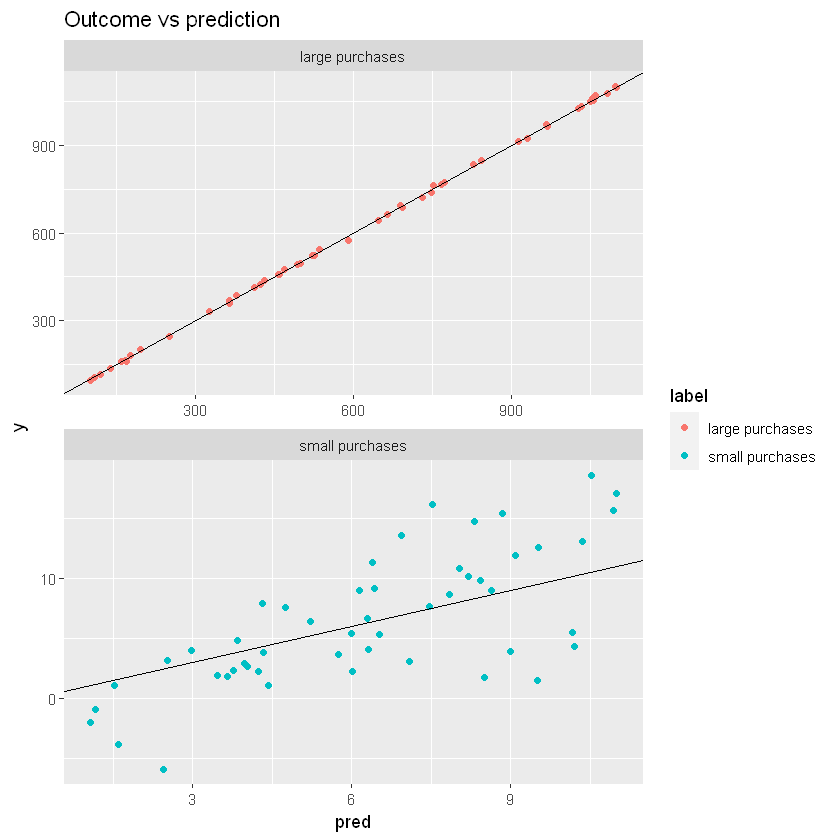

In [82]:
# fdata is in the workspace
summary(fdata)

# Examine the data: generate the summaries for the groups large and small:
fdata %>% 
    group_by(label) %>%        # group by small/large purchases
    summarize(min  = min(y),   # min of y
              mean = mean(y),  # mean of y
              max  = max(y))   # max of y

# Fill in the blanks to add error columns
fdata2 <- fdata %>% 
         group_by(label) %>%               # group by label
           mutate(residual = y - pred,     # Residual
                  relerr   = residual/y)   # Relative error

# Compare the rmse and rmse.rel of the large and small groups:
fdata2 %>% 
  group_by(label) %>% 
  summarize(rmse     = sqrt(mean(residual^2)),  # RMSE
            rmse.rel = sqrt(mean(relerr^2)))    # Root mean squared relative error
            
# Plot the predictions for both groups of purchases
ggplot(fdata2, aes(x = pred, y = y, color = label)) + 
  geom_point() + 
  geom_abline() + 
  facet_wrap(~ label, ncol = 1, scales = "free") + 
  ggtitle("Outcome vs prediction")

In [83]:
# Modeling log-transformed monetary output
# 
# In this exercise, you will practice modeling on log-transformed monetary output, 
# and then transforming the "log-money" predictions back into monetary units. 
# The data loaded into your workspace records subjects' incomes in 2005 (Income2005), 
# as well as the results of several aptitude tests taken by the subjects in 1981:
# 
# Arith
# Word
# Parag
# Math
# AFQT (Percentile on the Armed Forces Qualifying Test)
# The data have already been split into training and test sets (income_train and income_test respectively) and are in the workspace. You will build a model of log(income) from the inputs, and then convert log(income) back into income.
# 
# Instructions
# 
# Call summary() on income_train$Income2005 to see the summary statistics of income in the training set.
# Write a formula to express log(Income2005) as a function of the five tests as the variable fmla.log. Print it.
# Fit a linear model of log(Income2005) to the income_train data: model.log.
# Use model.log to predict income on the income_test dataset. Put it in the column logpred.
# Check summary() of logpred to see that the magnitudes are much different from those of Income2005.
# Reverse the log transformation to put the predictions into "monetary units": exp(income_test$logpred).
# Check summary() of pred.income and see that the magnitudes are now similar to Income2005 magnitudes.
# Fill in the blanks to plot a scatter plot of predicted income vs income on the test set.

In [84]:
income_train <- read.xlsx(file ="df.xlsx", sheetIndex = 5, header=TRUE)
income_test <- read.xlsx(file ="df.xlsx", sheetIndex = 6, header=TRUE)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     63   23000   39000   49894   61500  703637 

log(Income2005) ~ Arith + Word + Parag + Math + AFQT

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.766  10.133  10.423  10.419  10.705  11.006 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17432   25167   33615   35363   44566   60217 

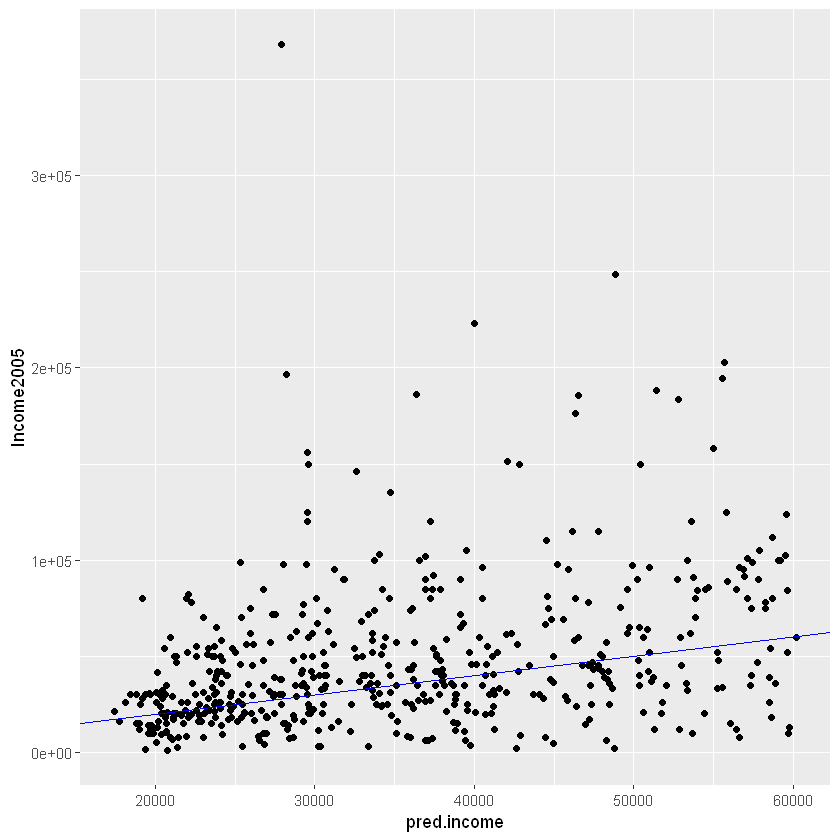

In [86]:
# Examine Income2005 in the training set
summary(income_train$Income2005)

# Write the formula for log income as a function of the tests and print it
(fmla.log <- log(Income2005) ~ Arith + Word + Parag + Math + AFQT)

# Fit the linear model
model.log <- lm(fmla.log, data = income_train)

# Make predictions on income_test
income_test$logpred <- predict(model.log, newdata = income_test)
summary(income_test$logpred)

# Convert the predictions to monetary units
income_test$pred.income <- exp(income_test$logpred)
summary(income_test$pred.income)

#  Plot predicted income (x axis) vs income
ggplot(income_test, aes(x = pred.income, y = Income2005)) + 
  geom_point() + 
  geom_abline(color = "blue")

In [87]:
# Comparing RMSE and root-mean-squared Relative Error
# 
# In this exercise, you will show that log-transforming a monetary 
# output before modeling improves mean relative error (but increases RMSE) compared to modeling 
# the monetary output directly. You will compare the results of model.log from the previous exercise 
# to a model (model.abs) that directly fits income.
# 
# The income_train and income_test datasets are loaded in your workspace, along with your model, model.log.
# 
# Also in the workspace:
# 
# model.abs: a model that directly fits income to the inputs using the formula
# 
# Income2005 ~ Arith + Word + Parag + Math + AFQT
# 
# Instructions
# 
# Fill in the blanks to add predictions from the models to income_test.
# Don’t forget to take the exponent of the predictions from model.log to undo the log transform!
# Fill in the blanks to gather() the predictions and calculate the residuals and relative error.
# Fill in the blanks to calculate the RMSE and relative RMSE for predictions.
# Which model has larger absolute error? Larger relative error?

In [88]:
fmla.abs <- Income2005 ~ Arith + Word + Parag + Math + AFQT

In [89]:
model.abs <- lm(fmla.abs, data = income_train)

In [90]:
# fmla.abs is in the workspace
fmla.abs

# model.abs is in the workspace
summary(model.abs)

# Add predictions to the test set
income_test <- income_test %>%
  mutate(pred.absmodel = predict(model.abs, income_test),      # predictions from model.abs
         pred.logmodel = exp(predict(model.log, income_test))) # predictions from model.log


Income2005 ~ Arith + Word + Parag + Math + AFQT


Call:
lm(formula = fmla.abs, data = income_train)

Residuals:
   Min     1Q Median     3Q    Max 
-78728 -24137  -6979  11964 648573 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  17516.7     6420.1   2.728  0.00642 ** 
Arith         1552.3      303.4   5.116 3.41e-07 ***
Word          -132.3      265.0  -0.499  0.61754    
Parag        -1155.1      618.3  -1.868  0.06189 .  
Math           725.5      372.0   1.950  0.05127 .  
AFQT           177.8      144.1   1.234  0.21734    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 45500 on 2063 degrees of freedom
Multiple R-squared:  0.1165,	Adjusted R-squared:  0.1144 
F-statistic:  54.4 on 5 and 2063 DF,  p-value: < 2.2e-16


In [91]:
# Gather the predictions and calculate residuals and relative error
income_long <- income_test %>% 
  gather(key = modeltype, value = pred, pred.absmodel, pred.logmodel) %>%
  mutate(residual = pred - Income2005,     # residuals
         relerr   = residual / Income2005) # relative error

# Calculate RMSE and relative RMSE and compare
income_long %>% 
  group_by(modeltype) %>%                       # group by modeltype
  summarize(rmse     = sqrt(mean(residual^2)),  # RMSE
            rmse.rel = sqrt(mean(relerr^2)))    # Root mean squared relative error

`summarise()` ungrouping output (override with `.groups` argument)



modeltype,rmse,rmse.rel
<chr>,<dbl>,<dbl>
pred.absmodel,37448.37,3.183705
pred.logmodel,39234.90,2.218663


In [92]:
# Input transforms: the "hockey stick"
# 
# In this exercise, we will build a model to predict price from a measure of the house's size (surface area). 
# The data set houseprice has the columns:
# 
# price : house price in units of $1000
# size: surface area
# A scatterplot of the data shows that the data is quite non-linear: 
# a sort of "hockey-stick" where price is fairly flat for smaller houses, 
# but rises steeply as the house gets larger. 
# Quadratics and tritics are often good functional forms to express hockey-stick like relationships. 
# Note that there may not be a "physical" reason that price is related to the square of the size; 
# a quadratic is simply a closed form approximation of the observed relationship.

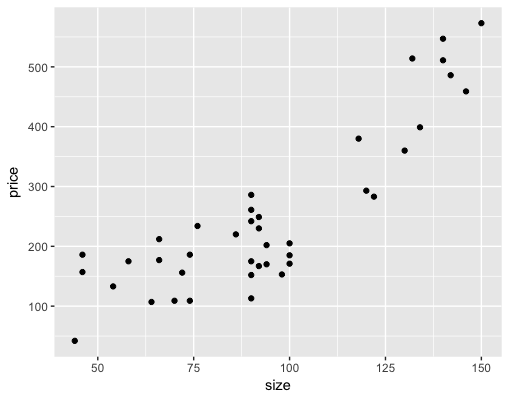

In [93]:
display_png(file="Ch3_V4_houseprice.png") 

In [94]:
# You will fit a model to predict price as a function of the squared size, 
# and look at its fit on the training data.
# 
# Because ^ is also a symbol to express interactions, use the function I() to treat the expression x^2 “as is”: 
# that is, as the square of x rather than the interaction of x with itself.
# 
# exampleFormula = y ~ I(x^2)
# 
# Instructions
# 
# The data set houseprice is in the workspace.
# 
# Write a formula, fmla_sqr, to express price as a function of squared size. Print it.
# Fit a model model_sqr to the data using fmla_sqr
# For comparison, fit a linear model model_lin to the data using the formula price ~ size.
# Fill in the blanks to
# make predictions from the training data from the two models
# gather the predictions into a single column pred
# graphically compare the predictions of the two models to the data. Which fits better?

In [95]:
houseprice <- readRDS("houseprice.rds") 

      size           price      
 Min.   : 44.0   Min.   : 42.0  
 1st Qu.: 73.5   1st Qu.:164.5  
 Median : 91.0   Median :203.5  
 Mean   : 94.3   Mean   :249.2  
 3rd Qu.:118.5   3rd Qu.:287.8  
 Max.   :150.0   Max.   :573.0  

price ~ I(size^2)

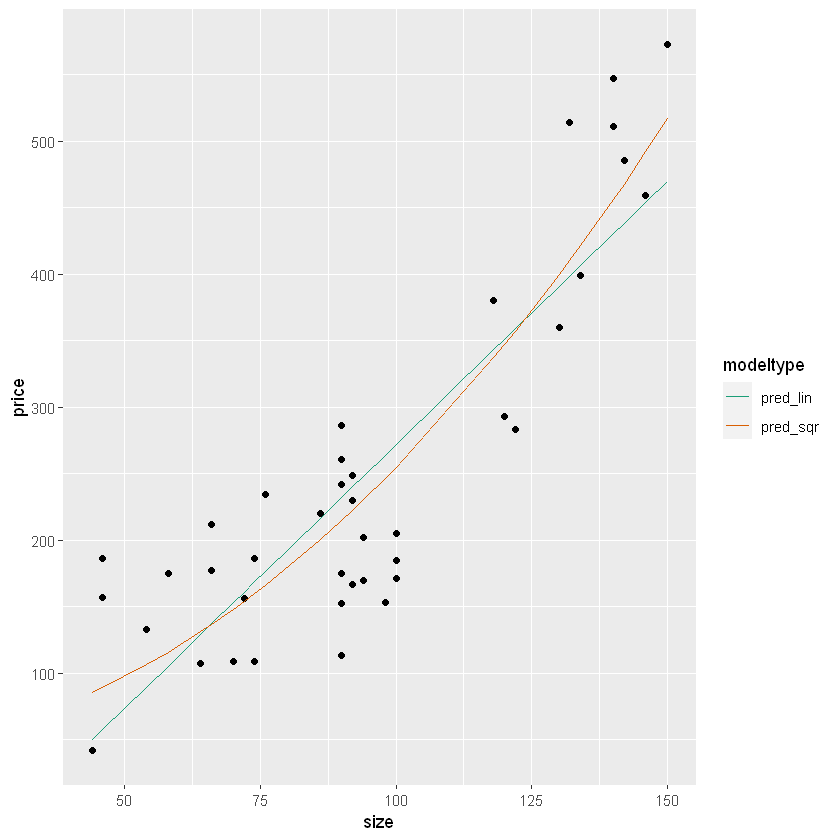

In [96]:
# houseprice is in the workspace
summary(houseprice)

# Create the formula for price as a function of squared size
(fmla_sqr <- price ~ I(size^2))

# Fit a model of price as a function of squared size (use fmla_sqr)
model_sqr <- lm(fmla_sqr, houseprice)

# Fit a model of price as a linear function of size
model_lin <- lm(price ~ size, houseprice)

# Make predictions and compare
houseprice %>% 
    mutate(pred_lin = predict(model_lin),       # predictions from linear model
           pred_sqr = predict(model_sqr)) %>%   # predictions from quadratic model 
    gather(key = modeltype, value = pred, pred_lin, pred_sqr) %>% # gather the predictions
    ggplot(aes(x = size)) + 
       geom_point(aes(y = price)) +                  # actual prices
       geom_line(aes(y = pred, color = modeltype)) + # the predictions
       scale_color_brewer(palette = "Dark2")

In [97]:
# Input transforms: the "hockey stick" (2)
# 
# In the last exercise you saw that a quadratic model seems to fit the houseprice data better than a linear model. 
# In this exercise you will confirm whether the quadratic model would perform better on out-of-sample data. 
# Since this data set is small, you will use cross-validation. 
# The quadratic formula fmla_sqr that you created in the last exercise is in your workspace.
# 
# For comparison, the sample code will calculate cross-validation predictions from a linear model price ~ size.
# 
# Instructions
# 
# The data frame houseprice and the formula fmla_sqr from the last exercise are in the workspace.
# 
# Use kWayCrossValidation() to create a splitting plan for a 3-fold cross validation.
# You can set the 3rd and 4th arguments of the function to NULL.
# Examine and run the sample code to get the 3-fold cross-validation predictions of 
# the model price ~ size and add them to the column pred_lin.
# Get the cross-validation predictions for price as a function of squared size. Assign them to the column pred_sqr.
# The sample code gives you the procedure.
# You can use the splitting plan you already created.
# Fill in the blanks to gather the predictions and calculate the residuals.
# Fill in the blanks to compare the RMSE for the two models. Which one fits better?

In [98]:
# houseprice is in the workspace
summary(houseprice)

# fmla_sqr is in the workspace
fmla_sqr

# Create a splitting plan for 3-fold cross validation
set.seed(34245)  # set the seed for reproducibility
splitPlan <- kWayCrossValidation(nrow(houseprice), 3, NULL, NULL)

# Sample code: get cross-val predictions for price ~ size
houseprice$pred_lin <- 0  # initialize the prediction vector
for(i in 1:3) {
  split <- splitPlan[[i]]
  model_lin <- lm(price ~ size, data = houseprice[split$train, ])
  houseprice$pred_lin[split$app] <- predict(model_lin, newdata = houseprice[split$app, ])
}

# Get cross-val predictions for price as a function of size^2 (use fmla_sqr)
houseprice$pred_sqr <- 0 # initialize the prediction vector
for(i in 1:3) {
  split <- splitPlan[[i]]
  model_sqr <- lm(fmla_sqr, data = houseprice[split$train, ])
  houseprice$pred_sqr[split$app] <- predict(model_sqr, newdata = houseprice[split$app, ])
}

# Gather the predictions and calculate the residuals
houseprice_long <- houseprice %>%
  gather(key = modeltype, value = pred, pred_lin, pred_sqr) %>%
  mutate(residuals = pred - price)

# Compare the cross-validated RMSE for the two models
houseprice_long %>% 
  group_by(modeltype) %>%
  summarize(rmse = sqrt(mean(residuals^2)))

      size           price      
 Min.   : 44.0   Min.   : 42.0  
 1st Qu.: 73.5   1st Qu.:164.5  
 Median : 91.0   Median :203.5  
 Mean   : 94.3   Mean   :249.2  
 3rd Qu.:118.5   3rd Qu.:287.8  
 Max.   :150.0   Max.   :573.0  

price ~ I(size^2)

`summarise()` ungrouping output (override with `.groups` argument)



modeltype,rmse
<chr>,<dbl>
pred_lin,73.14852
pred_sqr,60.27335


# 4.Dealing with Non-Linear Responses

Now that we have mastered linear models, we will begin to look at techniques for modeling situations that don't meet the assumptions of linearity. This includes predicting probabilities and frequencies (values bounded between 0 and 1); predicting counts (nonnegative integer values, and associated rates); and responses that have a non-linear but additive relationship to the inputs. These algorithms are variations on the standard linear model.

In [99]:
# Fit a model of sparrow survival probability
# 
# In this exercise, you will estimate the probability that a sparrow survives a severe winter storm, 
# based on physical characteristics of the sparrow. The dataset sparrow is loaded into your workspace. 
# The outcome to be predicted is status ("Survived", "Perished"). The variables we will consider are:
# 
# total_length: length of the bird from tip of beak to tip of tail (mm)
# weight: in grams
# humerus : length of humerus ("upper arm bone" that connects the wing to the body) (inches)
# Remember that when using glm() to create a logistic regression model, 
# you must explicitly specify that family = binomial:
# 
# glm(formula, data = data, family = binomial)
# You will call summary(), broom::glance() to see different functions for examining a logistic regression model. 

One of the diagnostics that you will look at is the analog to $$\(R^2\)$$, called pseudo-\(R^2\).

$$ pseudoR^2 = 1 - \frac{deviance}{null.deviance} $$


You can think of deviance as analogous to variance: it is a measure of the variation in categorical data. 
The pseudo- $\(R^2\)$ is analogous to $\(R^2\)$ for standard regression: $\(R^2\) $
is a measure of the "variance explained" of a regression model. 
The pseudo-\(R^2\) is a measure of the "deviance explained".

Instructions

The data frame sparrow and the package broom are loaded in the workspace.

As suggested in the video, you will predict on the outcomes TRUE and FALSE. 
Create a new column survived in the sparrow data frame that is TRUE when status == "Survived".

Create the formula fmla that expresses survived as a function of the variables of interest. Print it.

Fit a logistic regression model to predict the probability of sparrow survival. 
Assign the model to the variable sparrow_model.

Call summary() to see the coefficients of the model, the deviance and the null deviance.
Call glance() on the model to see the deviances and other diagnostics in a data frame. Assign the output from glance() to the variable perf.
Calculate the pseudo-\(R^2\).


In [100]:
sparrow <- readRDS("sparrow.rds") 

In [101]:
# sparrow is in the workspace
summary(sparrow)

# Create the survived column
sparrow$survived <- sparrow$status == "Survived"

# Create the formula
(fmla <- survived ~ total_length + weight + humerus)

# Fit the logistic regression model
sparrow_model <- glm(fmla, data = sparrow, family = binomial)

      status       age             total_length      wingspan    
 Perished:36   Length:87          Min.   :153.0   Min.   :236.0  
 Survived:51   Class :character   1st Qu.:158.0   1st Qu.:245.0  
               Mode  :character   Median :160.0   Median :247.0  
                                  Mean   :160.4   Mean   :247.5  
                                  3rd Qu.:162.5   3rd Qu.:251.0  
                                  Max.   :167.0   Max.   :256.0  
     weight       beak_head        humerus           femur       
 Min.   :23.2   Min.   :29.80   Min.   :0.6600   Min.   :0.6500  
 1st Qu.:24.7   1st Qu.:31.40   1st Qu.:0.7250   1st Qu.:0.7000  
 Median :25.8   Median :31.70   Median :0.7400   Median :0.7100  
 Mean   :25.8   Mean   :31.64   Mean   :0.7353   Mean   :0.7134  
 3rd Qu.:26.7   3rd Qu.:32.10   3rd Qu.:0.7500   3rd Qu.:0.7300  
 Max.   :31.0   Max.   :33.00   Max.   :0.7800   Max.   :0.7600  
    legbone          skull           sternum      
 Min.   :1.010   Min.   :

survived ~ total_length + weight + humerus

In [102]:
# Call summary
summary(sparrow_model)

# Call glance
(perf <- glance(sparrow_model))

# Calculate pseudo-R-squared
(pseudoR2 <- 1 - perf$deviance/perf$null.deviance)


Call:
glm(formula = fmla, family = binomial, data = sparrow)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1117  -0.6026   0.2871   0.6577   1.7082  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   46.8813    16.9631   2.764 0.005715 ** 
total_length  -0.5435     0.1409  -3.858 0.000115 ***
weight        -0.5689     0.2771  -2.053 0.040060 *  
humerus       75.4610    19.1586   3.939 8.19e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118.008  on 86  degrees of freedom
Residual deviance:  75.094  on 83  degrees of freedom
AIC: 83.094

Number of Fisher Scoring iterations: 5


null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
118.0084,86,-37.54718,83.09436,92.95799,75.09436,83


[1] 0.3636526

In [103]:
# Predict sparrow survival
# 
# In this exercise you will predict the probability of survival using the sparrow survival model from the previous exercise.
# 
# Recall that when calling predict() to get the predicted probabilities from a glm() model, 
# you must specify that you want the response:
# 
# predict(model, type = "response")
# Otherwise, predict() on a logistic regression model returns the predicted log-odds of the event, not the probability.
# 
# You will also use the GainCurvePlot() function to plot the gain curve from the model predictions. 
# If the model's gain curve is close to the ideal ("wizard") gain curve, 
# then the model sorted the sparrows well: that is, the model predicted that sparrows 
# that actually survived would have a higher probability of survival. The inputs to the GainCurvePlot() function are:
# 
# frame: data frame with prediction column and ground truth column
# xvar: the name of the column of predictions (as a string)
# truthVar: the name of the column with actual outcome (as a string)
# title: a title for the plot (as a string)
# GainCurvePlot(frame, xvar, truthVar, title)
# 
# Instructions
# 
# The dataframe sparrow and the model sparrow_model are in the workspace.
# 
# Create a new column in sparrow called pred that contains the predictions on the training data.
# Call GainCurvePlot() to create the gain curve of predictions. 
# Does the model do a good job of sorting the sparrows by whether or not they actually survived?

In [104]:
# sparrow is in the workspace
summary(sparrow)

# sparrow_model is in the workspace
summary(sparrow_model)

      status       age             total_length      wingspan    
 Perished:36   Length:87          Min.   :153.0   Min.   :236.0  
 Survived:51   Class :character   1st Qu.:158.0   1st Qu.:245.0  
               Mode  :character   Median :160.0   Median :247.0  
                                  Mean   :160.4   Mean   :247.5  
                                  3rd Qu.:162.5   3rd Qu.:251.0  
                                  Max.   :167.0   Max.   :256.0  
     weight       beak_head        humerus           femur       
 Min.   :23.2   Min.   :29.80   Min.   :0.6600   Min.   :0.6500  
 1st Qu.:24.7   1st Qu.:31.40   1st Qu.:0.7250   1st Qu.:0.7000  
 Median :25.8   Median :31.70   Median :0.7400   Median :0.7100  
 Mean   :25.8   Mean   :31.64   Mean   :0.7353   Mean   :0.7134  
 3rd Qu.:26.7   3rd Qu.:32.10   3rd Qu.:0.7500   3rd Qu.:0.7300  
 Max.   :31.0   Max.   :33.00   Max.   :0.7800   Max.   :0.7600  
    legbone          skull           sternum        survived      
 Min.   :


Call:
glm(formula = fmla, family = binomial, data = sparrow)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1117  -0.6026   0.2871   0.6577   1.7082  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)   46.8813    16.9631   2.764 0.005715 ** 
total_length  -0.5435     0.1409  -3.858 0.000115 ***
weight        -0.5689     0.2771  -2.053 0.040060 *  
humerus       75.4610    19.1586   3.939 8.19e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 118.008  on 86  degrees of freedom
Residual deviance:  75.094  on 83  degrees of freedom
AIC: 83.094

Number of Fisher Scoring iterations: 5


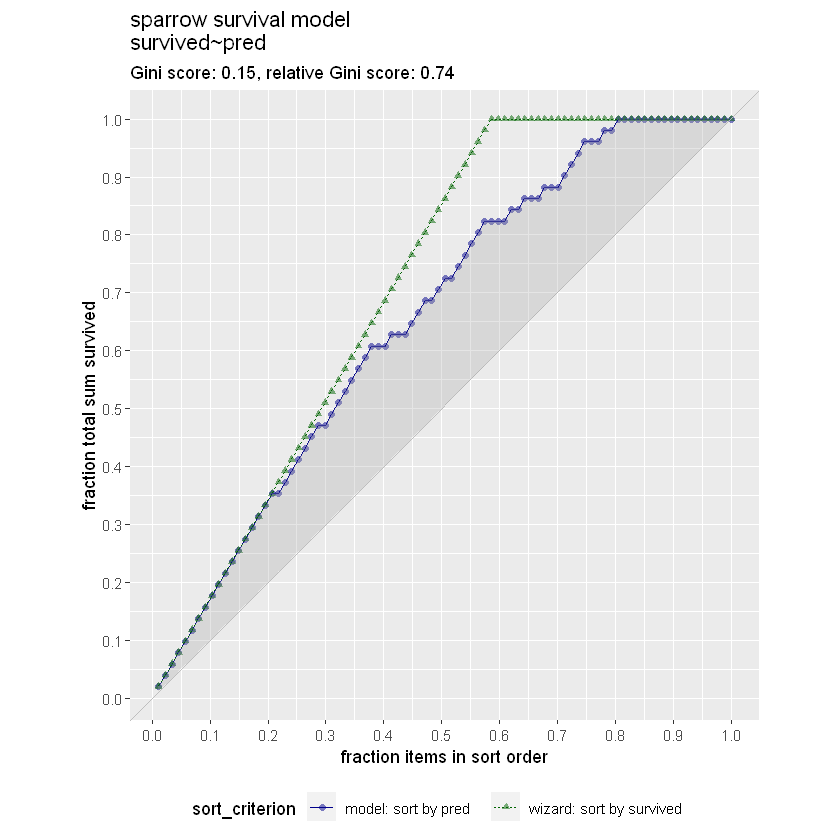

In [105]:
# Make predictions
sparrow$pred <- predict(sparrow_model, type = "response")

# Look at gain curve
GainCurvePlot(sparrow, "pred", "survived", "sparrow survival model")

In [106]:
# Fit a model to predict bike rental counts
# 
# In this exercise you will build a model to predict the number of bikes rented in an hour 
# as a function of the weather, the type of day (holiday, working day, or weekend), and the time of day. 
# You will train the model on data from the month of July.
# 
# The data frame has the columns:
# 
# cnt: the number of bikes rented in that hour (the outcome)
# hr: the hour of the day (0-23, as a factor)
# holiday: TRUE/FALSE
# workingday: TRUE if neither a holiday nor a weekend, else FALSE
# weathersit: categorical, "Clear to partly cloudy"/"Light Precipitation"/"Misty"
# temp: normalized temperature in Celsius
# atemp: normalized "feeling" temperature in Celsius
# hum: normalized humidity
# windspeed: normalized windspeed
# instant: the time index -- number of hours since beginning of data set (not a variable)
# mnth and yr: month and year indices (not variables)
# Remember that you must specify family = poisson or family = quasipoisson when using glm() to fit a count model.
# 
# Since there are a lot of input variables, for convenience we will specify the outcome and the inputs in variables, 
# and use paste() to assemble a string representing the model formula.
# 
# Instructions
# 
# The data frame bikesJuly is in the workspace. The names of the outcome variable and 
# the input variables are also in the workspace as the variables outcome and vars respectively.
# 
# Fill in the blanks to create the formula fmla expressing cnt as a function of the inputs. Print it.
# Calculate the mean (mean()) and variance (var()) of bikesJuly$cnt.
# Should you use poisson or quasipoisson regression?
# Use glm() to fit a model to the bikesJuly data: bike_model.
# Use glance() to look at the model's fit statistics. Assign the output of glance() to the variable perf.
# Calculate the pseudo-R-squared of the model.

In [107]:
Bikes <-load("Bikes.RData") 
outcome <- "cnt"
vars <- c("hr", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed")

In [108]:
# bikesJuly is in the workspace
str(bikesJuly)

# The outcome column
outcome 

# The inputs to use
vars 

# Create the formula string for bikes rented as a function of the inputs
(fmla <- paste(outcome, "~", paste(vars, collapse = " + ")))

# Calculate the mean and variance of the outcome
(mean_bikes <- mean(bikesJuly$cnt))
(var_bikes <- var(bikesJuly$cnt))

# Fit the model
bike_model <- glm(fmla, data = bikesJuly, family = quasipoisson)

# Call glance
(perf <- glance(bike_model))

# Calculate pseudo-R-squared
(pseudoR2 <- 1 - perf$deviance/perf$null.deviance)

'data.frame':	744 obs. of  12 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.76 0.74 0.72 0.72 0.7 0.68 0.7 0.74 0.78 0.82 ...
 $ atemp     : num  0.727 0.697 0.697 0.712 0.667 ...
 $ hum       : num  0.66 0.7 0.74 0.84 0.79 0.79 0.79 0.7 0.62 0.56 ...
 $ windspeed : num  0 0.1343 0.0896 0.1343 0.194 ...
 $ cnt       : int  149 93 90 33 4 10 27 50 142 219 ...
 $ instant   : int  13004 13005 13006 13007 13008 13009 13010 13011 13012 13013 ...
 $ mnth      : int  7 7 7 7 7 7 7 7 7 7 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...


[1] "cnt"

[1] "hr"         "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed"

[1] "cnt ~ hr + holiday + workingday + weathersit + temp + atemp + hum + windspeed"

[1] 273.6653

[1] 45863.84

null.deviance,df.null,logLik,AIC,BIC,deviance,df.residual
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
133364.9,743,NA,NA,NA,28774.9,712


[1] 0.7842393

In [109]:
# Predict bike rentals on new data
# 
# In this exercise you will use the model you built in the previous exercise 
# to make predictions for the month of August. The data set bikesAugust has the same columns as bikesJuly.
# 
# Recall that you must specify type = "response" with predict() when predicting counts 
# from a glm poisson or quasipoisson model.
# 
# Instructions
# 
# The model bike_model and the data frame bikesAugust are in the workspace.
# 
# Use predict to predict the number of bikes per hour on the bikesAugust data. 
# Assign the predictions to the column bikesAugust$pred.
# 
# Fill in the blanks to get the RMSE of the predictions on the August data.
# Fill in the blanks to generate the plot of predictions to actual counts.
# Do any of the predictions appear negative?

In [110]:
# bikesAugust is in the workspace
str(bikesAugust)

# bike_model is in the workspace
summary(bike_model)

# Make predictions on August data
bikesAugust$pred <- predict(bike_model, newdata = bikesAugust, type = "response")

# Calculate the RMSE
bikesAugust %>% 
  mutate(residual = pred - cnt) %>%
  summarize(rmse  = sqrt(mean(residual^2)))

'data.frame':	744 obs. of  12 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.68 0.66 0.64 0.64 0.64 0.64 0.64 0.64 0.66 0.68 ...
 $ atemp     : num  0.636 0.606 0.576 0.576 0.591 ...
 $ hum       : num  0.79 0.83 0.83 0.83 0.78 0.78 0.78 0.83 0.78 0.74 ...
 $ windspeed : num  0.1642 0.0896 0.1045 0.1045 0.1343 ...
 $ cnt       : int  47 33 13 7 4 49 185 487 681 350 ...
 $ instant   : int  13748 13749 13750 13751 13752 13753 13754 13755 13756 13757 ...
 $ mnth      : int  8 8 8 8 8 8 8 8 8 8 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...



Call:
glm(formula = fmla, family = quasipoisson, data = bikesJuly)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-21.6117   -4.3121   -0.7223    3.5507   16.5079  

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    5.934986   0.439027  13.519  < 2e-16 ***
hr1                           -0.580055   0.193354  -3.000 0.002794 ** 
hr2                           -0.892314   0.215452  -4.142 3.86e-05 ***
hr3                           -1.662342   0.290658  -5.719 1.58e-08 ***
hr4                           -2.350204   0.393560  -5.972 3.71e-09 ***
hr5                           -1.084289   0.230130  -4.712 2.96e-06 ***
hr6                            0.211945   0.156476   1.354 0.176012    
hr7                            1.211135   0.132332   9.152  < 2e-16 ***
hr8                            1.648361   0.127177  12.961  < 2e-16 ***
hr9                            1.155669   0.133927   8.629  < 2e-16 ***
h

rmse
<dbl>
112.5815


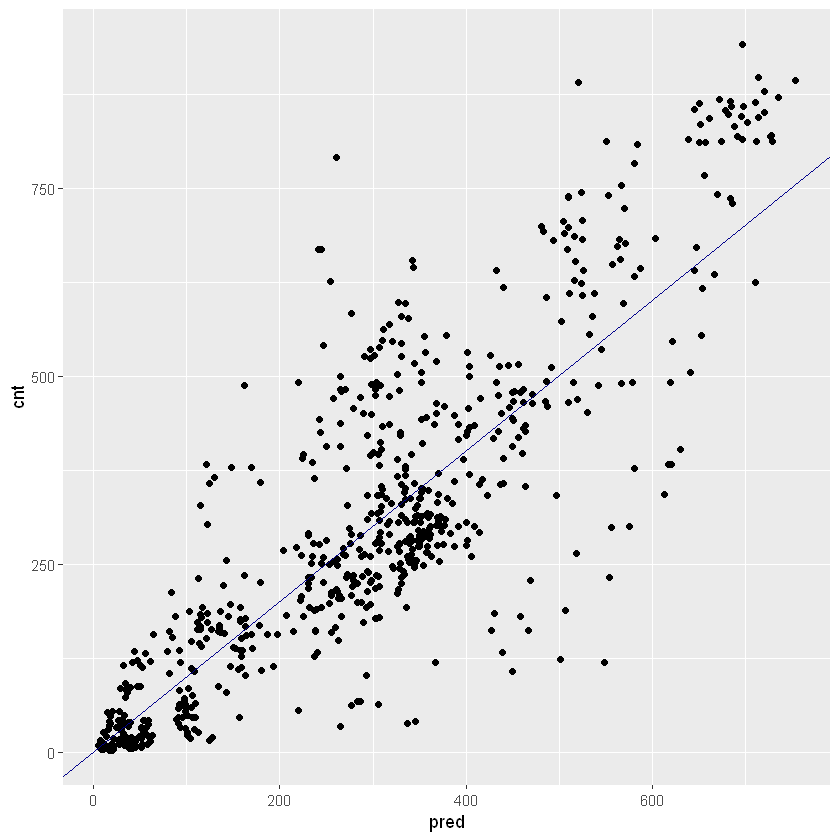

In [111]:
# Plot predictions vs cnt (pred on x-axis)
ggplot(bikesAugust, aes(x = pred, y = cnt)) +
  geom_point() + 
  geom_abline(color = "darkblue")

In [112]:
# Visualize the Bike Rental Predictions
# 
# In the previous exercise, you visualized the bike model's predictions using 
# the standard "outcome vs. prediction" scatter plot. Since the bike rental data is time series data, 
# you might be interested in how the model performs as a function of time. 
# In this exercise, you will compare the predictions and actual rentals on an hourly basis, 
# for the first 14 days of August.
# 
# To create the plot you will use the function tidyr::gather() to consolidate 
# the predicted and actual values from bikesAugust in a single column. gather() takes as arguments:
# 
# The "wide" data frame to be gathered (implicit in a pipe)
# The name of the key column to be created - contains the names of the gathered columns.
# The name of the value column to be created - contains the values of the gathered columns.
# The names of the columns to be gathered into a single column.
# You'll use the gathered data frame to compare the actual and predicted rental counts as a function of time. 
# The time index, instant counts the number of observations since the beginning of data collection. 
# The sample code converts the instants to daily units, starting from 0.
# 
# Instructions
# 
# The data frame bikesAugust, with the predictions (bikesAugust$pred) is in the workspace.
# 
# Fill in the blanks to plot the predictions and actual counts by hour for the first 14 days of August.
# convert instant to be in day units, rather than hour
# gather() the cnt and pred columns into a column called value, with a key called valuetype.
# filter() for the first two weeks of August
# Plot value as a function of instant (day).
# Does the model see the general time patterns in bike rentals?

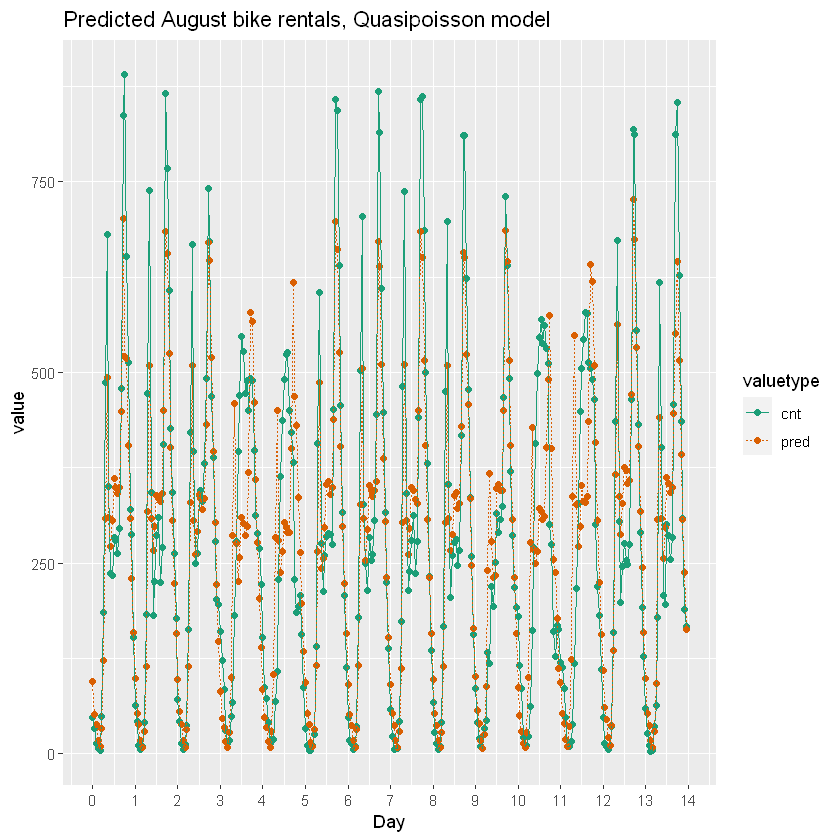

In [113]:
# Plot predictions and cnt by date/time
bikesAugust %>% 
  # set start to 0, convert unit to days
  mutate(instant = (instant - min(instant))/24) %>%  
  # gather cnt and pred into a value column
  gather(key = valuetype, value = value, cnt, pred) %>%
  filter(instant < 14) %>% # restrict to first 14 days
  # plot value by instant
  ggplot(aes(x = instant, y = value, color = valuetype, linetype = valuetype)) + 
  geom_point() + 
  geom_line() + 
  scale_x_continuous("Day", breaks = 0:14, labels = 0:14) + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Predicted August bike rentals, Quasipoisson model")

In [114]:
# Model soybean growth with GAM
# 
# In this exercise you will model the average leaf weight on a soybean plant as a function of time (after planting). 
# As you will see, the soybean plant doesn't grow at a steady rate, 
# but rather has a "growth spurt" that eventually tapers off. 
# Hence, leaf weight is not well described by a linear model.
# 
# Recall that you can designate which variable you want 
# to model non-linearly in a formula with the s() function:
# 
# y ~ s(x)
# Also remember that gam() from the package mgcv has the calling interface
# 
# gam(formula, family, data)
# For standard regression, use family = gaussian (the default).
# 
# The soybean training data, soybean_train is loaded into your workspace. 
# It has two columns: the outcome weight and the variable Time. 
# For comparison, the linear model model.lin, which was fit using the formula weight ~ Time 
# has already been loaded into the workspace as well.
# 
# Instructions 1/3
# Fill in the blanks to plot weight versus Time (Time on x-axis). Does the relationship look linear?

In [116]:
# install.packages('mgcv')

In [117]:
soybean_train <- read.xlsx(file ="df.xlsx", sheetIndex = 7, header=TRUE)

      Plot     Variety      Year           Time           weight       
 1988F6 : 10   F:161   Min.   :1988   Min.   :14.00   Min.   : 0.0290  
 1988F7 :  9   P:169   1st Qu.:1988   1st Qu.:27.00   1st Qu.: 0.6663  
 1988P1 :  9           Median :1989   Median :42.00   Median : 3.5233  
 1988P2 :  9           Mean   :1989   Mean   :43.56   Mean   : 6.1645  
 1988P8 :  9           3rd Qu.:1990   3rd Qu.:56.00   3rd Qu.:10.3808  
 1988F3 :  8           Max.   :1990   Max.   :84.00   Max.   :27.3700  
 (Other):276                                                           

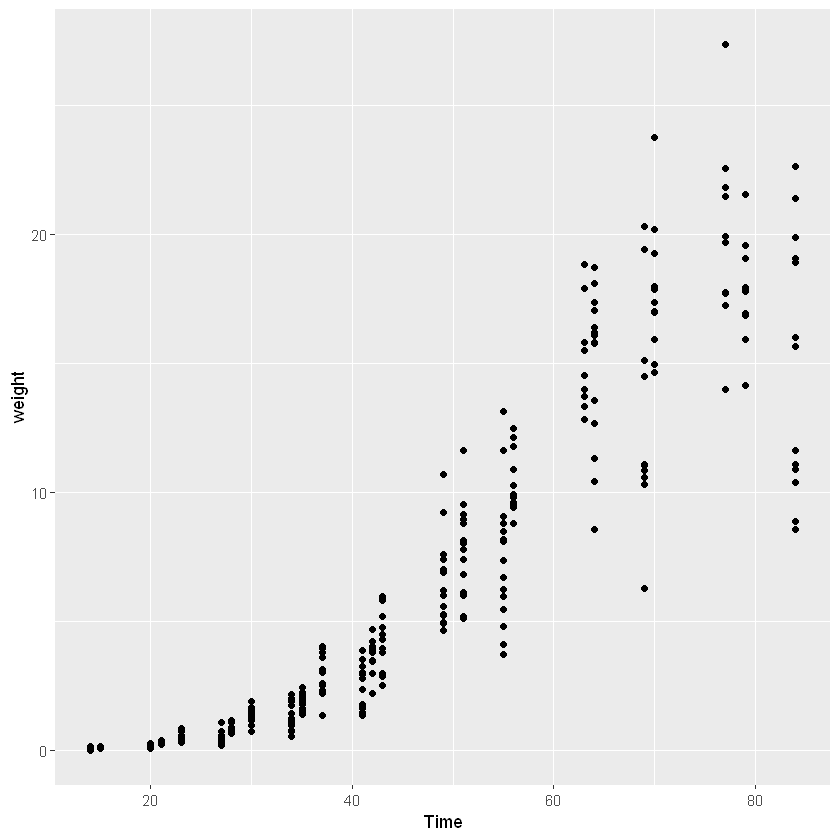

In [118]:
# soybean_train is in the workspace
summary(soybean_train)

# Plot weight vs Time (Time on x axis)
ggplot(soybean_train, aes(x = Time, y = weight)) + 
  geom_point() 

In [119]:
# Instructions 2/3
# 
# Load the package mgcv.
# Create the formula fmla.gam to express weight as a non-linear function of Time. Print it.
# Fit a generalized additive model on soybean_train using fmla.gam.

In [121]:
# Load the package mgcv
library(mgcv)

# Create the formula 
(fmla.gam <- weight ~ s(Time) )

# Fit the GAM Model
model.gam <- gam(fmla.gam, data = soybean_train, family = gaussian)

weight ~ s(Time)

In [122]:
# Instructions 3/3
# 
# Call summary() on the linear model model.lin (already in your workspace). What is the R2?
# Call summary() on 'model.gam. The "deviance explained" reports the model's unadjusted R2. 
# What is the R2? Which model appears to be a better fit to the training data?
# 
# Call plot() on model.gam to see the derived relationship between Time and weight.

In [123]:
fmla.lin <- weight ~ Time
model.lin <- lm(formula = fmla.lin, data = soybean_train)

In [124]:
# From previous step
library(mgcv)
fmla.gam <- weight ~ s(Time)
model.gam <- gam(fmla.gam, data = soybean_train, family = gaussian)

# Call summary() on model.lin and look for R-squared
summary(model.lin)

# Call summary() on model.gam and look for R-squared
summary(model.gam)


Call:
lm(formula = fmla.lin, data = soybean_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3933 -1.7100 -0.3909  1.9056 11.4381 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.559283   0.358527  -18.30   <2e-16 ***
Time         0.292094   0.007444   39.24   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.778 on 328 degrees of freedom
Multiple R-squared:  0.8244,	Adjusted R-squared:  0.8238 
F-statistic:  1540 on 1 and 328 DF,  p-value: < 2.2e-16



Family: gaussian 
Link function: identity 

Formula:
weight ~ s(Time)

Parametric coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.1645     0.1143   53.93   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Approximate significance of smooth terms:
          edf Ref.df     F p-value    
s(Time) 8.495   8.93 338.2  <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-sq.(adj) =  0.902   Deviance explained = 90.4%
GCV = 4.4395  Scale est. = 4.3117    n = 330

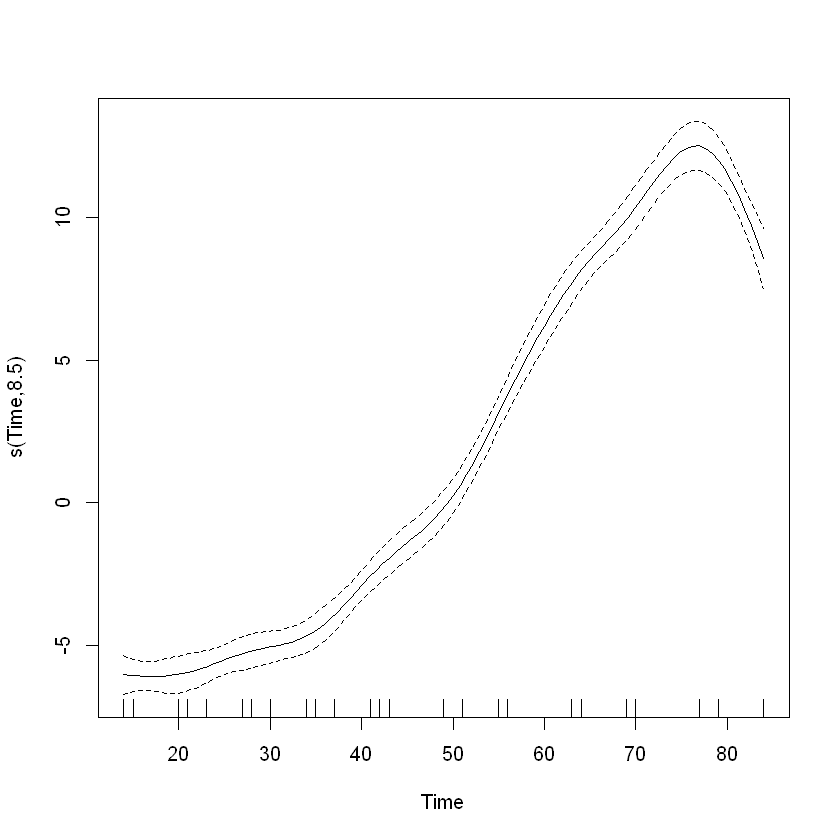

In [125]:
# Call plot() on model.gam
plot(model.gam)

In [126]:
# Predict with the soybean model on test data
# 
# In this exercise you will apply the soybean models from the previous exercise 
# (model.lin and model.gam, already in your workspace) to new data: soybean_test.
# 
# Instructions
# 
# The data frame soybean_test and the models model.lin and model.gam are in the workspace.
# 
# Create a column soybean_test$pred.lin with predictions from the linear model model.lin.
# Create a column soybean_test$pred.gam with predictions from the gam model model.gam.
# For GAM models, the predict() method returns a matrix, so use as.numeric() to convert the matrix to a vector.
# Fill in the blanks to gather() the prediction columns into a single value column pred with key column modeltype. 
# Call the long dataframe soybean_long.
# Calculate and compare the RMSE of both models.
# Which model does better?
# Run the code to compare the predictions of each model against the actual average leaf weights.
# A scatter plot of weight as a function of Time.
# Point-and-line plots of the predictions (pred) as a function of Time.
# Notice that the linear model sometimes predicts negative weights! Does the gam model?

In [127]:
soybean_test <- read.xlsx(file ="df.xlsx", sheetIndex = 8, header=TRUE)

In [129]:
# soybean_test is in the workspace
summary(soybean_test)

# Get predictions from linear model
soybean_test$pred.lin <- predict(model.lin, newdata = soybean_test)

# Get predictions from gam model
soybean_test$pred.gam <- as.numeric(predict(model.gam, newdata = soybean_test))

# Gather the predictions into a "long" dataset
soybean_long <- soybean_test %>%
  gather(key = modeltype, value = pred, pred.lin, pred.gam)

# Calculate the rmse
soybean_long %>%
  mutate(residual = weight - pred) %>%     # residuals
  group_by(modeltype) %>%                  # group by modeltype
  summarize(rmse = sqrt(mean(residual^2))) # calculate the RMSE

      Plot    Variety      Year           Time           weight       
 1988F8 : 4   F:43    Min.   :1988   Min.   :14.00   Min.   : 0.0380  
 1988P7 : 4   P:39    1st Qu.:1988   1st Qu.:23.00   1st Qu.: 0.4248  
 1989F8 : 4           Median :1989   Median :41.00   Median : 3.0025  
 1990F8 : 4           Mean   :1989   Mean   :44.09   Mean   : 7.1576  
 1988F1 : 3           3rd Qu.:1990   3rd Qu.:69.00   3rd Qu.:15.0113  
 1988F2 : 3           Max.   :1990   Max.   :84.00   Max.   :30.2717  
 (Other):60                                                           
    pred.lin          pred.gam      
 Min.   :-2.4700   Min.   : 0.1084  
 1st Qu.: 0.1589   1st Qu.: 0.4156  
 Median : 5.4166   Median : 3.6137  
 Mean   : 6.3178   Mean   : 6.8382  
 3rd Qu.:13.5952   3rd Qu.:14.7402  
 Max.   :17.9766   Max.   :18.6845  
                                    

`summarise()` ungrouping output (override with `.groups` argument)



modeltype,rmse
<chr>,<dbl>
pred.gam,2.286451
pred.lin,3.190995


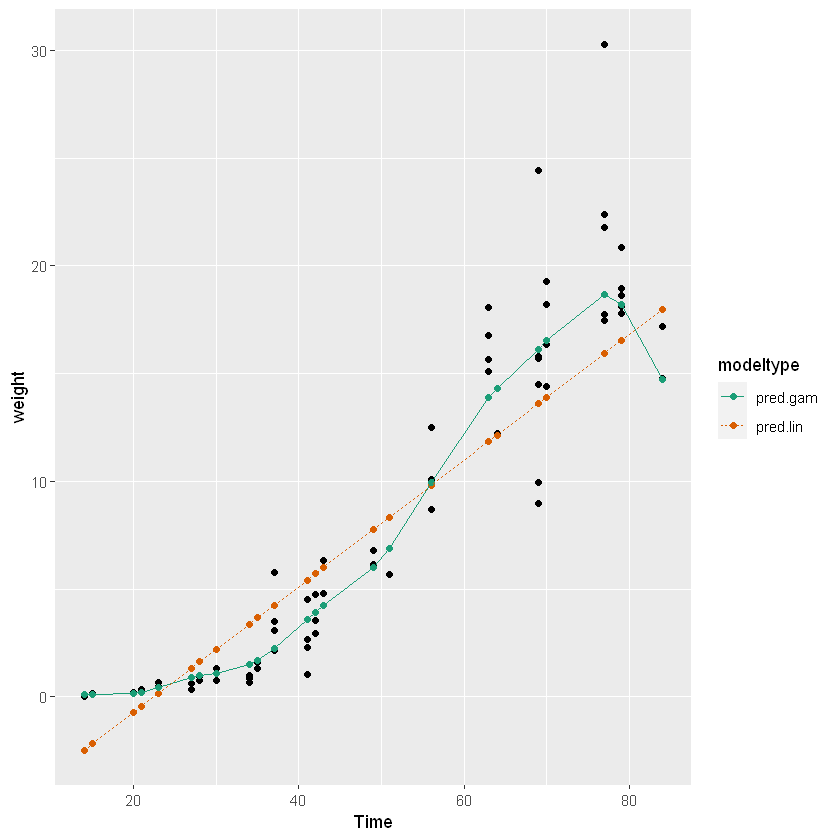

In [130]:
# Compare the predictions against actual weights on the test data
soybean_long %>%
  ggplot(aes(x = Time)) +                          # the column for the x axis
  geom_point(aes(y = weight)) +                    # the y-column for the scatterplot
  geom_point(aes(y = pred, color = modeltype)) +   # the y-column for the point-and-line plot
  geom_line(aes(y = pred, color = modeltype, linetype = modeltype)) + # the y-column for the point-and-line plot
  scale_color_brewer(palette = "Dark2")

# 5. Tree-Based Methods

In this chapter we will look at modeling algorithms that do not assume linearity or additivity, and that can learn limited types of interactions among input variables. These algorithms are *tree-based* methods that work by combining ensembles of *decision trees* that are learned from the training data.

In [131]:
# Build a random forest model for bike rentals
# 
# In this exercise you will again build a model to predict the number of bikes rented in an hour 
# as a function of the weather, the type of day (holiday, working day, or weekend), and the time of day. 
# You will train the model on data from the month of July.
# 
# You will use the ranger package to fit the random forest model. 
# For this exercise, the key arguments to the ranger() call are:
# 
# formula
# data
# num.trees: the number of trees in the forest.
# respect.unordered.factors : Specifies how to treat unordered factor variables. We recommend setting this 
# to "order" for regression.
# seed: because this is a random algorithm, you will set the seed to get reproducible results
# Since there are a lot of input variables, for convenience we will specify the outcome and the inputs in 
# the variables outcome and vars, and use paste() to assemble a string representing the model formula.
# 
# Instructions
# 
# The data frame bikesJuly is in the workspace. The sample code specifies the names of the outcome and input variables.
# 
# Fill in the blanks to create the formula fmla expressing cnt as a function of the inputs. Print it.
# Load the package ranger.
# Use ranger to fit a model to the bikesJuly data: bike_model_rf.
# The first argument to ranger() is the formula, fmla.
# Use 500 trees and respect.unordered.factors = "order".
# Set the seed to seed for reproducible results.
# Print the model. What is the R-squared?

In [133]:
seed <- set.seed(423563)
# install.packages('ranger')

In [134]:
# bikesJuly is in the workspace
str(bikesJuly)

# Random seed to reproduce results
seed

# the outcome column
(outcome <- "cnt")

# The input variables
(vars <- c("hr", "holiday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed"))

# Create the formula string for bikes rented as a function of the inputs
(fmla <- paste(outcome, "~", paste(vars, collapse = " + ")))

# Load the package ranger
library(ranger)

# Fit and print the random forest model.
(bike_model_rf <- ranger(fmla, 
                         bikesJuly, 
                         num.trees = 500, 
                         respect.unordered.factors = "order", 
                         seed = seed))

'data.frame':	744 obs. of  12 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.76 0.74 0.72 0.72 0.7 0.68 0.7 0.74 0.78 0.82 ...
 $ atemp     : num  0.727 0.697 0.697 0.712 0.667 ...
 $ hum       : num  0.66 0.7 0.74 0.84 0.79 0.79 0.79 0.7 0.62 0.56 ...
 $ windspeed : num  0 0.1343 0.0896 0.1343 0.194 ...
 $ cnt       : int  149 93 90 33 4 10 27 50 142 219 ...
 $ instant   : int  13004 13005 13006 13007 13008 13009 13010 13011 13012 13013 ...
 $ mnth      : int  7 7 7 7 7 7 7 7 7 7 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...


NULL

[1] "cnt"

[1] "hr"         "holiday"    "workingday" "weathersit" "temp"      
[6] "atemp"      "hum"        "windspeed"

[1] "cnt ~ hr + holiday + workingday + weathersit + temp + atemp + hum + windspeed"

Ranger result

Call:
 ranger(fmla, bikesJuly, num.trees = 500, respect.unordered.factors = "order",      seed = seed) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      744 
Number of independent variables:  8 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       8573.135 
R squared (OOB):                  0.8130742 

In [135]:
# Predict bike rentals with the random forest model
# 
# In this exercise you will use the model that you fit in the previous exercise 
# to predict bike rentals for the month of August.
# 
# The predict() function for a ranger model produces a list. 
# One of the elements of this list is predictions, a vector of predicted values. 
# You can access predictions with the $ notation for accessing named elements of a list:
# 
# predict(model, data)$predictions
# 
# Instructions
# 
# The model bike_model_rf and the dataset bikesAugust (for evaluation) are loaded into your workspace.
# 
# Call predict() on bikesAugust to predict the number of bikes rented in August (cnt). 
# Add the predictions to bikesAugust as the column pred.
# Fill in the blanks to calculate the root mean squared error of the predictions.
# The poisson model you built for this data gave an RMSE of about 112.6. How does this model compare?
# Fill in the blanks to plot actual bike rental counts (cnt) versus the predictions (pred on x-axis).

In [136]:
bike_model_rf <- ranger(fmla, bikesJuly, num.trees = 500, respect.unordered.factors = "order",      seed = seed)

In [137]:
# bikesAugust is in the workspace
str(bikesAugust)

# bike_model_rf is in the workspace
bike_model_rf

# Make predictions on the August data
bikesAugust$pred <- predict(bike_model_rf, bikesAugust)$predictions

# Calculate the RMSE of the predictions
bikesAugust %>% 
  mutate(residual = cnt - pred)  %>%        # calculate the residual
  summarize(rmse  = sqrt(mean(residual^2))) # calculate rmse

'data.frame':	744 obs. of  13 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.68 0.66 0.64 0.64 0.64 0.64 0.64 0.64 0.66 0.68 ...
 $ atemp     : num  0.636 0.606 0.576 0.576 0.591 ...
 $ hum       : num  0.79 0.83 0.83 0.83 0.78 0.78 0.78 0.83 0.78 0.74 ...
 $ windspeed : num  0.1642 0.0896 0.1045 0.1045 0.1343 ...
 $ cnt       : int  47 33 13 7 4 49 185 487 681 350 ...
 $ instant   : int  13748 13749 13750 13751 13752 13753 13754 13755 13756 13757 ...
 $ mnth      : int  8 8 8 8 8 8 8 8 8 8 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pred      : num  94.96 51.74 37.98 17.58 9.36 ...


Ranger result

Call:
 ranger(fmla, bikesJuly, num.trees = 500, respect.unordered.factors = "order",      seed = seed) 

Type:                             Regression 
Number of trees:                  500 
Sample size:                      744 
Number of independent variables:  8 
Mtry:                             2 
Target node size:                 5 
Variable importance mode:         none 
Splitrule:                        variance 
OOB prediction error (MSE):       8076.313 
R squared (OOB):                  0.8239068 

rmse
<dbl>
95.79021


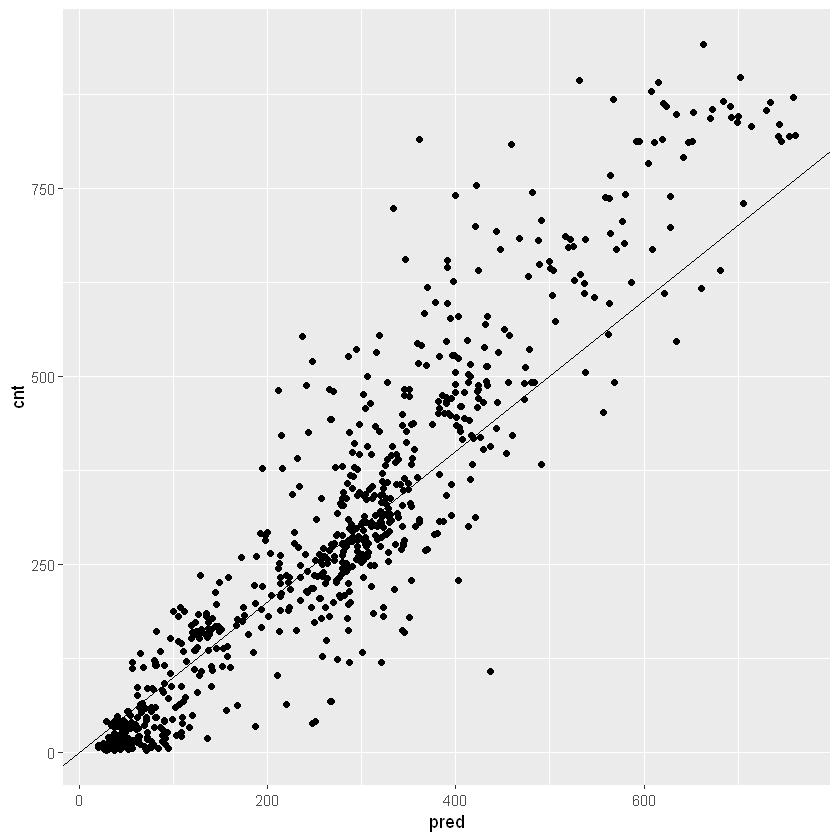

In [138]:
# Plot actual outcome vs predictions (predictions on x-axis)
ggplot(bikesAugust, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

In [139]:
# Visualize random forest bike model predictions
# 
# In the previous exercise, you saw that the random forest bike model did better on 
# the August data than the quasiposson model, in terms of RMSE.
# 
# In this exercise you will visualize the random forest model's August predictions as a function of time. 
# The corresponding plot from the quasipoisson model that you built in a previous exercise is in 
# the workspace for you to compare.
# 
# Recall that the quasipoisson model mostly identified the pattern of slow and busy hours in the day, 
# but it somewhat underestimated peak demands. You would like to see how the random forest model compares.
# 
# The data frame bikesAugust (with predictions) is in the workspace. 
# The plot quasipoisson_plot of quasipoisson model predictions as a function of time is shown.
# 
# Instructions
# 
# Fill in the blanks to plot the predictions and actual counts by hour for the first 14 days of August.
# gather the cnt and pred columns into a column called value, with a key called valuetype.
# Plot value as a function of instant (day).
# How does the random forest model compare?

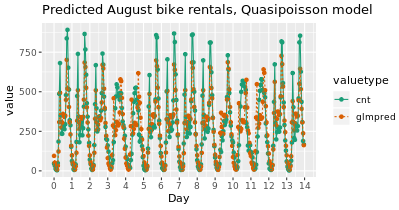

In [140]:
display_png(file="quasipoisson.png")  

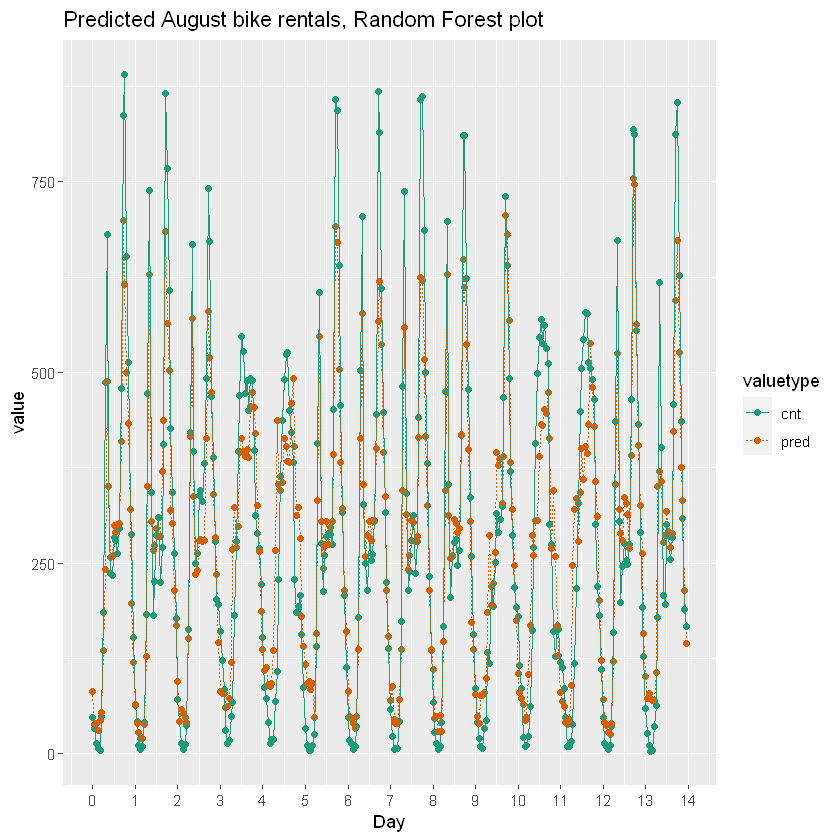

In [141]:
first_two_weeks <- bikesAugust %>% 
  # Set start to 0, convert unit to days
  mutate(instant = (instant - min(instant)) / 24) %>% 
  # Gather cnt and pred into a column named value with key valuetype
  gather(key = valuetype, value = value, cnt, pred) %>%
  # Filter for rows in the first two
  filter(instant < 14) 

# Plot predictions and cnt by date/time 
ggplot(first_two_weeks, aes(x = instant, y = value, color = valuetype, linetype = valuetype)) + 
  geom_point() + 
  geom_line() + 
  scale_x_continuous("Day", breaks = 0:14, labels = 0:14) + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Predicted August bike rentals, Random Forest plot")

In [142]:
# vtreat on a small example
# 
# In this exercise you will use vtreat to one-hot-encode a categorical variable on a small example. 
# vtreat creates a treatment plan to transform categorical variables into indicator variables (coded "lev"), 
# and to clean bad values out of numerical variables (coded "clean").
# 
# To design a treatment plan use the function designTreatmentsZ()
# 
# treatplan <- designTreatmentsZ(data, varlist)
# data: the original training data frame
# varlist: a vector of input variables to be treated (as strings).
# designTreatmentsZ() returns a list with an element scoreFrame: 
# a data frame that includes the names and types of the new variables:
# 
# scoreFrame <- treatplan %>% 
#             magrittr::use_series(scoreFrame) %>% 
#             select(varName, origName, code)
# varName: the name of the new treated variable
# origName: the name of the original variable that the treated variable comes from
# code: the type of the new variable.
# "clean": a numerical variable with no NAs or NaNs
# "lev": an indicator variable for a specific level of the original categorical variable.
# (magrittr::use_series() is an alias for $ that you can use in pipes.)
# 
# For these exercises, we want varName where code is either "clean" or "lev":
# 
# newvarlist <- scoreFrame %>% 
#              filter(code %in% c("clean", "lev") %>%
#              magrittr::use_series(varName)
# To transform the data set into all numerical and one-hot-encoded variables, use prepare():
# 
# data.treat <- prepare(treatplan, data, varRestrictions = newvarlist)
# treatplan: the treatment plan
# data: the data frame to be treated
# varRestrictions: the variables desired in the treated data
# Instructions
# 
# The data frame dframe and the package magrittr are loaded in the workspace.
# 
# Print dframe. We will assume that color and size are input variables, and popularity is the outcome to be predicted.
# Create a vector called vars with the names of the input variables (as strings).
# Load the package vtreat.
# Use designTreatmentsZ() to create a treatment plan for the variables in vars. Assign it to the variable treatplan.
# Get and examine the scoreFrame from the treatment plan to see the mapping from old variables to new variables.
# You only need the columns varName, origName and code.
# What are the names of the new indicator variables? Of the continuous variable?
# Create a vector newvars that contains the variable varName where code is either clean or lev. Print it.
# Use prepare() to create a new data frame dframe.treat 
# that is a one-hot-encoded version of dframe (without the outcome column).
# Print it and compare to dframe.

In [143]:
dframe <- read.xlsx(file ="df.xlsx", sheetIndex = 9, header=TRUE)

In [145]:
#install.packages('magrittr')

In [147]:
library(magrittr)

In [148]:
# dframe is in the workspace
dframe

# Create a vector of variable names
(vars <- c("color", "size"))

# Load the package vtreat
library(vtreat)

# Create the treatment plan
treatplan <- designTreatmentsZ(dframe, vars)

# Examine the scoreFrame
(scoreFrame <- treatplan %>%
    use_series(scoreFrame) %>%
    select(varName, origName, code))

# We only want the rows with codes "clean" or "lev"
(newvars <- scoreFrame %>%
    filter(code %in% c("clean", "lev")) %>%
    use_series(varName))

# Create the treated training data
(dframe.treat <- prepare(treatplan, dframe, varRestriction = newvars))

color,size,popularity
<fct>,<dbl>,<dbl>
b,13,1.0785088
r,11,1.3956245
r,15,0.9217988
r,14,1.2025453
r,13,1.0838662
b,11,0.8043527
r,9,1.1035440
g,12,0.8746332
b,7,0.6947058


[1] "color" "size"

[1] "vtreat 1.6.0 inspecting inputs Wed Jul 08 10:51:21 2020"
[1] "designing treatments Wed Jul 08 10:51:21 2020"
[1] " have initial level statistics Wed Jul 08 10:51:21 2020"
[1] " scoring treatments Wed Jul 08 10:51:21 2020"
[1] "have treatment plan Wed Jul 08 10:51:21 2020"


,varName,origName,code
,<chr>,<chr>,<chr>
1,color_catP,color,catP
2,size,size,clean
3,color_lev_x_b,color,lev
4,color_lev_x_g,color,lev
5,color_lev_x_r,color,lev


[1] "size"          "color_lev_x_b" "color_lev_x_g" "color_lev_x_r"

size,color_lev_x_b,color_lev_x_g,color_lev_x_r
<dbl>,<dbl>,<dbl>,<dbl>
13,1,0,0
11,0,0,1
15,0,0,1
14,0,0,1
13,0,0,1
11,1,0,0
9,0,0,1
12,0,1,0
7,1,0,0


In [149]:
# Find the right number of trees for a gradient boosting machine
# 
# In this exercise you will get ready to build a gradient boosting model to predict 
# the number of bikes rented in an hour as a function of the weather and the type and time of day. 
# You will train the model on data from the month of July.
# 
# The July data is loaded into your workspace. Remember that bikesJuly.treat no longer has the outcome column, 
# so you must get it from the untreated data: bikesJuly$cnt.
# 
# You will use the xgboost package to fit the random forest model. 
# The function xgb.cv() uses cross-validation to estimate the out-of-sample learning error 
# as each new tree is added to the model. The appropriate number of trees to use in the final model is 
# the number that minimizes the holdout RMSE.
# 
# For this exercise, the key arguments to the xgb.cv() call are:
# 
# data: a numeric matrix.
# label: vector of outcomes (also numeric).
# nrounds: the maximum number of rounds (trees to build).
# nfold: the number of folds for the cross-validation. 5 is a good number.
# objective: "reg:linear" for continuous outcomes.
# eta: the learning rate.
# max_depth: depth of trees.
# early_stopping_rounds: after this many rounds without improvement, stop.
# verbose: 0 to stay silent.
# 
# Instructions
# 
# The data frames bikesJuly and bikesJuly.treat are in the workspace.
# 
# Load the package xgboost.
# Fill in the blanks to run xgb.cv() on the treated training data; assign the output to the variable cv.
# Use as.matrix() to convert the vtreated data frame to a matrix.
# Use 100 rounds, and 5-fold cross validation.
# Set early_stopping_rounds to 10.
# Set eta to 0.3, max_depth to 6.
# Get the data frame evaluation_log from cv and assign it to the variable elog. 
# Each row of the evaluation_log corresponds to an additional tree, 
# so the row number tells you the number of trees in the model.
# Fill in the blanks to get the number of trees with the minimum value of the columns train_rmse_mean and test_rmse_mean.
# which.min() returns the index of the minimum value in a vector.
# How many trees do you need?

In [151]:
# install.packages("xgboost")

In [152]:
bikesJuly.treat <- read.xlsx(file ="df.xlsx", sheetIndex = 10, header=TRUE)

In [154]:
# The July data is in the workspace
ls()

# Load the package xgboost
library(xgboost)

# Run xgb.cv
cv <- xgb.cv(data = as.matrix(bikesJuly.treat), 
            label = bikesJuly$cnt,
            nrounds = 100,
            nfold = 5,
            objective = "reg:linear",
            eta = 0.3,
            max_depth = 6,
            early_stopping_rounds = 10,
            verbose = 0   # silent
)

# Get the evaluation log
elog <- cv$evaluation_log

# Determine and print how many trees minimize training and test error
elog %>% 
  summarize(ntrees.train = which.min(train_rmse_mean),   # find the index of min(train_rmse_mean)
            ntrees.test  = which.min(test_rmse_mean))    # find the index of min(test_rmse_mean)

[1] "alcohol"             "bike_model"          "bike_model_rf"      
 [4] "Bikes"               "bikesAugust"         "bikesJuly"          
 [7] "bikesJuly.treat"     "bloodpressure"       "bloodpressure_model"
[10] "cv"                  "dframe"              "dframe.treat"       
[13] "elog"                "fdata"               "fdata2"             
[16] "fe_mean"             "first_two_weeks"     "flower_model"       
[19] "flowers"             "fmla"                "fmla.abs"           
[22] "fmla.gam"            "fmla.lin"            "fmla.log"           
[25] "fmla_add"            "fmla_interaction"    "fmla_sqr"           
[28] "gp"                  "houseprice"          "houseprice_long"    
[31] "i"                   "income_long"         "income_test"        
[34] "income_train"        "k"                   "mean_bikes"         
[37] "mmat"                "model"               "model.abs"          
[40] "model.gam"           "model.lin"           "model.log"          
[43] "model_add"           "model_interaction"   "model_lin"          
[46] "model_sqr"           "mpg"                 "mpg_model"          
[49] "mpg_test"            "mpg_train"           "N"                  
[52] "newrates"            "newvars"             "nRows"              
[55] "outcome"             "perf"                "pred"               
[58] "pseudoR2"            "res"                 "rho"                
[61] "rho2"                "rmse"                "rmse_test"          
[64] "rmse_train"          "rsq"                 "rsq_glance"         
[67] "rsq_test"            "rsq_train"           "rss"                
[70] "scoreFrame"          "sd_unemployment"     "seed"               
[73] "soybean_long"        "soybean_test"        "soybean_train"      
[76] "sparrow"             "sparrow_model"       "split"              
[79] "splitPlan"           "target"              "treatplan"          
[82] "tss"                 "unemployment"        "unemployment_model" 
[85] "var_bikes"           "vars"

[10:57:34] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:34] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:34] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:34] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:57:34] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


ntrees.train,ntrees.test
<int>,<int>
85,75


In [155]:
# Fit an xgboost bike rental model and predict
# 
# In this exercise you will fit a gradient boosting model using xgboost() to predict 
# the number of bikes rented in an hour as a function of the weather and the type and time of day. 
# You will train the model on data from the month of July and predict on data for the month of August.
# 
# The datasets for July and August are loaded into your workspace. Remember the vtreat-ed data 
# no longer has the outcome column, so you must get it from the original data (the cnt column).
# 
# For convenience, the number of trees to use, ntrees from the previous exercise is in the workspace.
# 
# The arguments to xgboost() are similar to those of xgb.cv().
# 
# Instructions
# 
# The data frames bikesJuly, bikesJuly.treat, bikesAugust and bikesAugust.treat are in the workspace. 
# The number of trees ntrees is in the workspace.
# 
# Fill in the blanks to run xgboost() on the July data. Assign the model to the variable model.
# Use as.matrix() to convert the vtreated data frame to a matrix.
# The objective should be "reg:linear".
# Use ntrees rounds.
# Set eta to 0.3, depth to 6, and verbose to 0 (silent).
# Now call predict() on bikesAugust.treat to predict the number of bikes rented in August.
# Use as.matrix() to convert the vtreat-ed test data into a matrix.
# Add the predictions tobikesAugust as the column pred.
# Fill in the blanks to plot actual bike rental counts versus the predictions (predictions on the x-axis).
# Do you see a possible problem with the predictions?

In [156]:
ntrees <- 84
bikesAugust.treat <- read.xlsx(file ="df.xlsx", sheetIndex = 11, header=TRUE)

[1] "alcohol"             "bike_model"          "bike_model_rf"      
 [4] "Bikes"               "bikesAugust"         "bikesAugust.treat"  
 [7] "bikesJuly"           "bikesJuly.treat"     "bloodpressure"      
[10] "bloodpressure_model" "cv"                  "dframe"             
[13] "dframe.treat"        "elog"                "fdata"              
[16] "fdata2"              "fe_mean"             "first_two_weeks"    
[19] "flower_model"        "flowers"             "fmla"               
[22] "fmla.abs"            "fmla.gam"            "fmla.lin"           
[25] "fmla.log"            "fmla_add"            "fmla_interaction"   
[28] "fmla_sqr"            "gp"                  "houseprice"         
[31] "houseprice_long"     "i"                   "income_long"        
[34] "income_test"         "income_train"        "k"                  
[37] "mean_bikes"          "mmat"                "model"              
[40] "model.abs"           "model.gam"           "model.lin"          
[43] "model.log"           "model_add"           "model_interaction"  
[46] "model_lin"           "model_sqr"           "mpg"                
[49] "mpg_model"           "mpg_test"            "mpg_train"          
[52] "N"                   "newrates"            "newvars"            
[55] "nRows"               "ntrees"              "outcome"            
[58] "perf"                "pred"                "pseudoR2"           
[61] "res"                 "rho"                 "rho2"               
[64] "rmse"                "rmse_test"           "rmse_train"         
[67] "rsq"                 "rsq_glance"          "rsq_test"           
[70] "rsq_train"           "rss"                 "scoreFrame"         
[73] "sd_unemployment"     "seed"                "soybean_long"       
[76] "soybean_test"        "soybean_train"       "sparrow"            
[79] "sparrow_model"       "split"               "splitPlan"          
[82] "target"              "treatplan"           "tss"                
[85] "unemployment"        "unemployment_model"  "var_bikes"          
[88] "vars"

[1] 84

[10:58:52] WARNING: amalgamation/../src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[10:58:52] WARNING: amalgamation/../src/learner.cc:480: 
Parameters: { depth } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




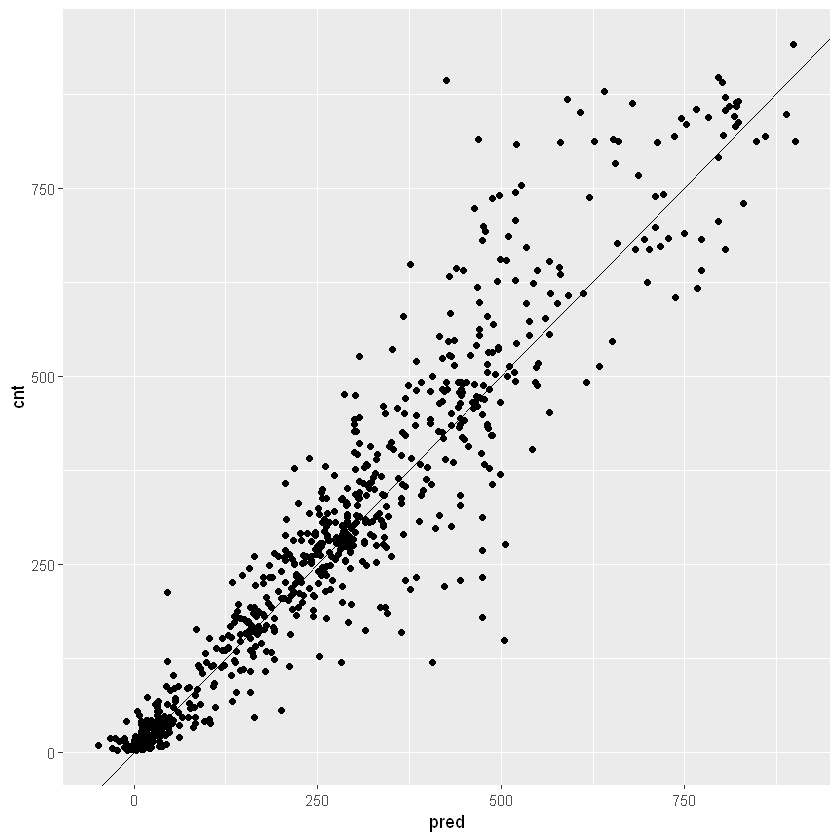

In [157]:
# Examine the workspace
ls()

# The number of trees to use, as determined by xgb.cv
ntrees

# Run xgboost
bike_model_xgb <- xgboost(data = as.matrix(bikesJuly.treat), # training data as matrix
                   label = bikesJuly$cnt,  # column of outcomes
                   nrounds = ntrees,       # number of trees to build
                   objective = "reg:linear", # objective
                   eta = 0.3,
                   depth = 6,
                   verbose = 0  # silent
)

# Make predictions
bikesAugust$pred <- predict(bike_model_xgb, as.matrix(bikesAugust.treat))

# Plot predictions vs actual bike rental count
ggplot(bikesAugust, aes(x = pred, y = cnt)) + 
  geom_point() + 
  geom_abline()

In [158]:
# Evaluate the xgboost bike rental model
# 
# In this exercise you will evaluate the gradient boosting model bike_model_xgb 
# that you fit in the last exercise, using data from the month of August. 
# You'll compare this model's RMSE for August to the RMSE of previous models that you've built.
# 
# The dataset bikesAugust is in the workspace. You have already made predictions using the xgboost model; 
# they are in the column pred.
# 
# Instructions
# 
# Fill in the blanks to calculate the RMSE of the predictions.
# How does it compare to the RMSE from the poisson model (approx. 112.6) and the random forest model (approx. 96.7)?

In [159]:
# bikesAugust is in the workspace
str(bikesAugust)

# Calculate RMSE
bikesAugust %>%
  mutate(residuals = cnt - pred) %>%
  summarize(rmse = sqrt(mean(residuals^2)))

'data.frame':	744 obs. of  13 variables:
 $ hr        : Factor w/ 24 levels "0","1","2","3",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ holiday   : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ workingday: logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ weathersit: chr  "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" "Clear to partly cloudy" ...
 $ temp      : num  0.68 0.66 0.64 0.64 0.64 0.64 0.64 0.64 0.66 0.68 ...
 $ atemp     : num  0.636 0.606 0.576 0.576 0.591 ...
 $ hum       : num  0.79 0.83 0.83 0.83 0.78 0.78 0.78 0.83 0.78 0.74 ...
 $ windspeed : num  0.1642 0.0896 0.1045 0.1045 0.1343 ...
 $ cnt       : int  47 33 13 7 4 49 185 487 681 350 ...
 $ instant   : int  13748 13749 13750 13751 13752 13753 13754 13755 13756 13757 ...
 $ mnth      : int  8 8 8 8 8 8 8 8 8 8 ...
 $ yr        : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pred      : num  48.548 35.349 0.625 -6.652 3.563 ...


rmse
<dbl>
76.36407


In [160]:
# Visualize the xgboost bike rental model
# 
# You've now seen three different ways to model the bike rental data. 
# For this example, you've seen that the gradient boosting model had the smallest RMSE. 
# To finish up the course, let's compare the gradient boosting model's predictions 
# to the other two models as a function of time.
# 
# On completing this exercise, you will have completed the course. 
# Congratulations! Now you have the tools to apply a variety of approaches to your regression tasks.
# 
# Instructions
# 
# The data frame bikesAugust with predictions, is in the workspace. 
# The plots quasipoisson_plot and randomforest_plot are also in the workspace.
# 
# Print quasipoisson_plot to review the quasipoisson model's behavior.
# Print randomforest_plot to review the random forest model's behavior.
# Fill in the blanks to plot the gradient boosting predictions and actual counts by hour for the first 14 days of August.
# gather() the cnt and pred columns into a column called value, with a key called valuetype.
# Plot value as a function of instant (day).
# How does the gradient boosting model compare to the previous models?

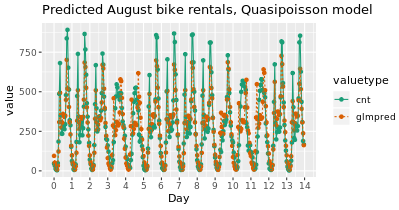

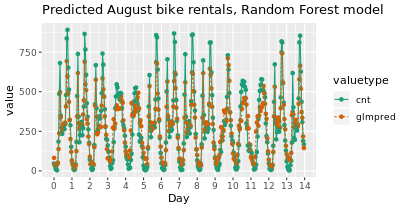

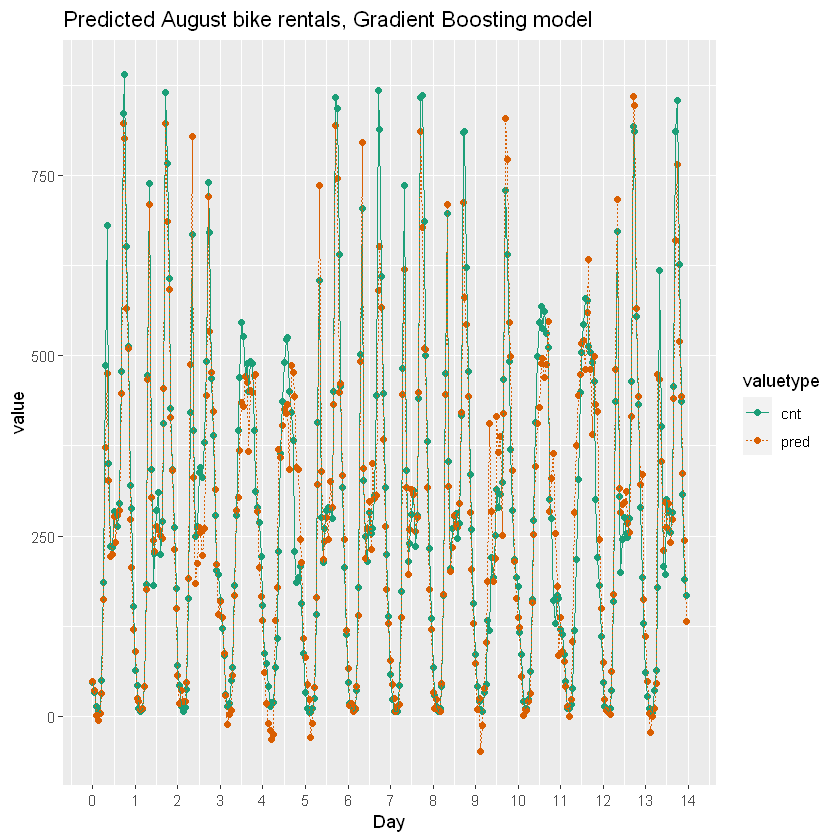

In [161]:
# Print quasipoisson_plot
#quasipoisson_plot
display_png(file="quasipoissonplot.png") 
# Print randomforest_plot
#randomforest_plot
display_png(file="randomforestplot.png") 

# Plot predictions and actual bike rentals as a function of time (days)
bikesAugust %>% 
  mutate(instant = (instant - min(instant))/24) %>%  # set start to 0, convert unit to days
  gather(key = valuetype, value = value, cnt, pred) %>%
  filter(instant < 14) %>% # first two weeks
  ggplot(aes(x = instant, y = value, color = valuetype, linetype = valuetype)) + 
  geom_point() + 
  geom_line() + 
  scale_x_continuous("Day", breaks = 0:14, labels = 0:14) + 
  scale_color_brewer(palette = "Dark2") + 
  ggtitle("Predicted August bike rentals, Gradient Boosting model")

# ENS OF THIS EXCELLENT COURSE